In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
import seaborn as sns
import numpy as np
import os
import scipy.stats as stats

# Global variables

In [44]:
# Available databases: POINTER, MMB, lcamDIN99WDC, BIGC, Qiao, RIT_DiPoint_Individual, RIT_COM_V5, WangHan, NCSU
database = 'POINTER'

base_path_1 = rf'global_path_to\resultsInconsistenciesFuzzyRule_{database}_ID_DETALLE_1'
base_path_2 = rf'global_path_to\resultsInconsistenciesFuzzyRule_{database}_ID_DETALLE_2'

plot_width = 16
plot_height = 6

# Auxilary functions

In [45]:
# Function to read the value from the threshold.csv file
def read_csv_value(file):
    with open(file, "r") as csvfile:
        reader = csv.reader(csvfile)
        # Get the value at position 0:0
        row = next(reader, None)
        if row is not None and len(row) > 0:
            return float(row[0])
        else:
            raise ValueError("The CSV file does not contain the expected format.")

In [46]:
# Method to calculate the STRESS of a dataset 
# @obj: DV
# @subj: DE 

# Function to calculate the stress value
def stress(obj, subj):
    F2Num = np.sum(obj * subj)
    F2Denom = np.sum(obj ** 2)
    F2 = F2Num / F2Denom
    
    Num = np.sum((F2 * obj - subj) ** 2)
    Denom = np.sum(subj ** 2)
    Value = 100 * np.sqrt(Num / Denom)
    
    return Value, F2


## Reading files

In [47]:
# Create dictionaries to store data from each file
threshold = {}

inconsistentPairs_1 = {}
numInconsistentPairs_1 = {}

inconsistentPairs_2 = {}
numInconsistentPairs_2 = {}

# DataOut
dataOut_file_path_1 = f'{base_path_1}/DatosOut.csv'  # Build the complete file path for DataOutput file
dataOut_file_path_2 = f'{base_path_2}/DatosOut.csv'  # Build the complete file path for DataOutput file

dataOut_1 = pd.read_csv(dataOut_file_path_1, delimiter=',', header=None)
dataOut_2 = pd.read_csv(dataOut_file_path_2, delimiter=',', header=None)

num_experimental_dataOut_1 = dataOut_1.shape[0] 
num_experimental_dataOut_2 = dataOut_2.shape[0] 

# Iterate over sequential file names
for i in range(0, 20):
    threshold_file_path = f'{base_path_1}/umbral{i}.csv'  # Build the complete file path for the threshold file
    inconsistentPairs_file_path_1 = f'{base_path_1}/ParesInconsistentes{i}.csv'  # Build the complete file path for InconsistentPairs file
    inconsistentPairs_file_path_2 = f'{base_path_2}/ParesInconsistentes{i}.csv'  # Build the complete file path for InconsistentPairs file


    # Read the CSV file and store it in the corresponding dictionary
    threshold[i] = read_csv_value(threshold_file_path)
    inconsistentPairs_1[i] = pd.read_csv(inconsistentPairs_file_path_1, delimiter=',')
    inconsistentPairs_2[i] = pd.read_csv(inconsistentPairs_file_path_2, delimiter=',')

    # Get the number of columns
    num_columns_inconsistentPairs = inconsistentPairs_1[i].shape[1]

    # Get the number of rows
    numInconsistentPairs_1[i] = inconsistentPairs_1[i].shape[0] 
    numInconsistentPairs_2[i] = inconsistentPairs_2[i].shape[0] 

# Convert the dictionaries into lists for use in later graphs
threshold_list = list(threshold.values())
numInconsistentPairs_list_1 = list(numInconsistentPairs_1.values())
numInconsistentPairs_list_2 = list(numInconsistentPairs_2.values())

print(f'{len(threshold_list)} files read successfully. From threshold {threshold_list[0]} to threshold {threshold_list[len(threshold_list)-1]}')


20 files read successfully. From threshold 0.05 to threshold 1.0


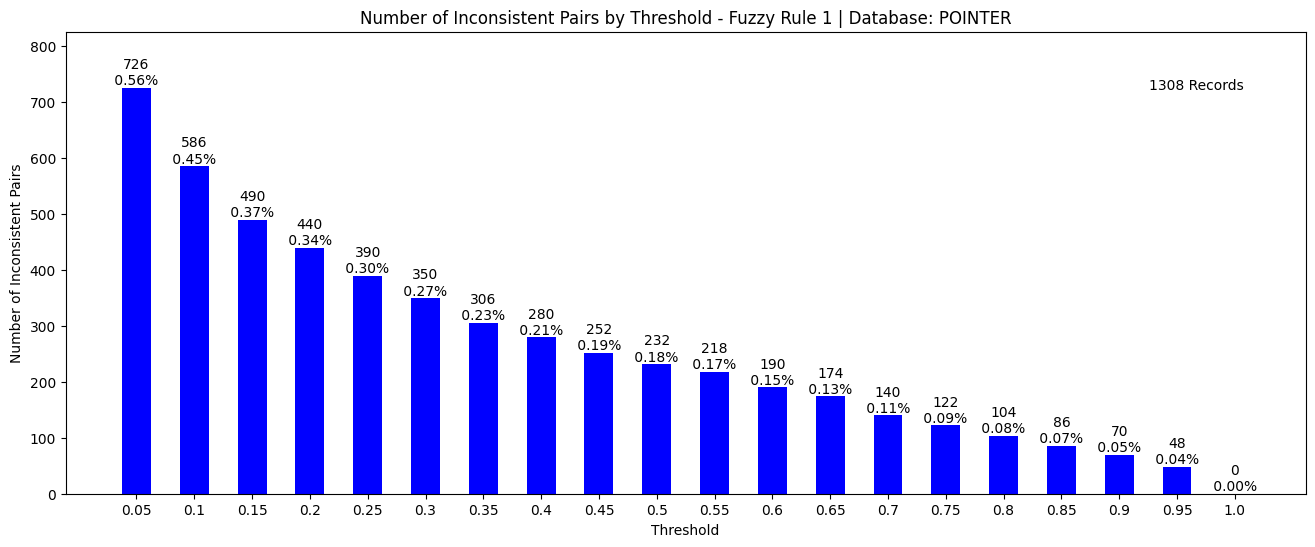

In [48]:
# Adjust the figure size
plt.figure(figsize=(plot_width, plot_height)) 

# Create the bar chart
bar_width = 0.5  # Width of the bars
bar_positions = np.arange(len(threshold_list))
bars = plt.bar(bar_positions, numInconsistentPairs_list_1, width=bar_width, color='blue')
plt.xticks(bar_positions, threshold_list)  # Display threshold values on the x-axis
plt.xlabel("Threshold")
plt.ylabel("Number of Inconsistent Pairs")
plt.title(f"Number of Inconsistent Pairs by Threshold - Fuzzy Rule 1 | Database: {database}")

# Add numerical values at the center of each bar
for i, value in enumerate(numInconsistentPairs_list_1):
    plt.text(bar_positions[i], value, f'{value}\n {(value/num_experimental_dataOut_1):.2f}% ', ha='center', va='bottom')

# Adjust the Y-axis scale
plt.ylim(0, max(numInconsistentPairs_list_1) + 100)

plt.text(0.95, 0.90, f'{num_experimental_dataOut_1} Records', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')
 

plt.show()


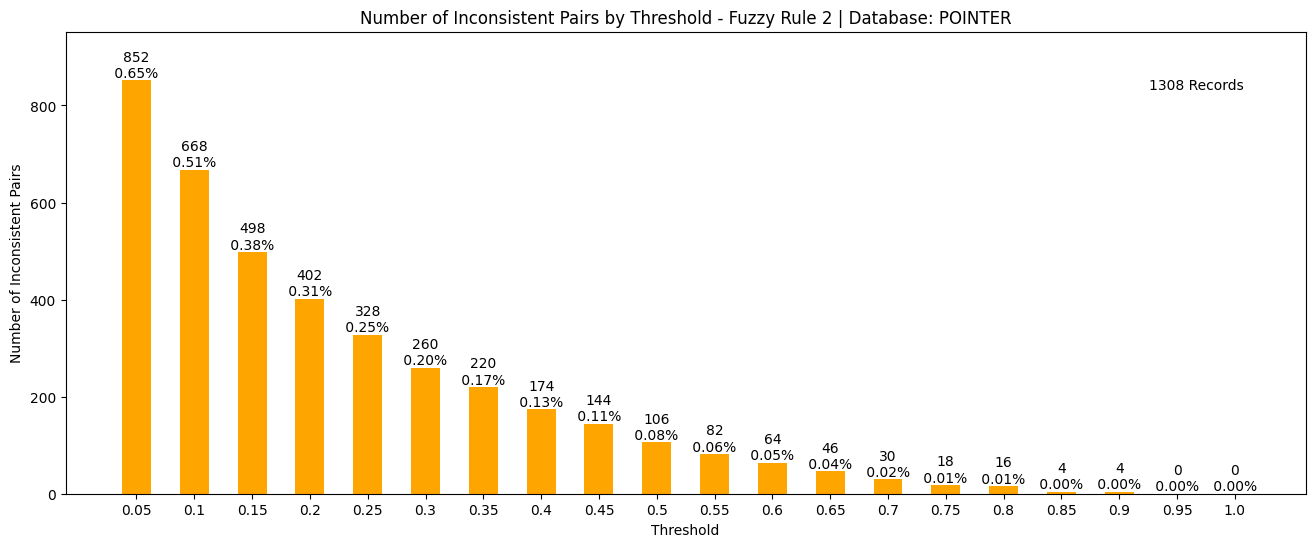

In [49]:
# Adjust the figure size
plt.figure(figsize=(plot_width, plot_height))

# Create the bar chart
bar_width = 0.5  # Width of the bars
bar_positions = np.arange(len(threshold_list))
bars = plt.bar(bar_positions, numInconsistentPairs_list_2, width=bar_width, color='orange')
plt.xticks(bar_positions, threshold_list)  # Display threshold values on the x-axis
plt.xlabel("Threshold")
plt.ylabel("Number of Inconsistent Pairs")
plt.title(f"Number of Inconsistent Pairs by Threshold - Fuzzy Rule 2 | Database: {database}")

# Add numerical values at the center of each bar
for i, value in enumerate(numInconsistentPairs_list_2):
    plt.text(bar_positions[i], value, f'{value}\n {(value/num_experimental_dataOut_2):.2f}% ', ha='center', va='bottom')

# Adjust the Y-axis scale
plt.ylim(0, max(numInconsistentPairs_list_2) + 100)

plt.text(0.95, 0.90, f'{num_experimental_dataOut_2} Records', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

plt.show()


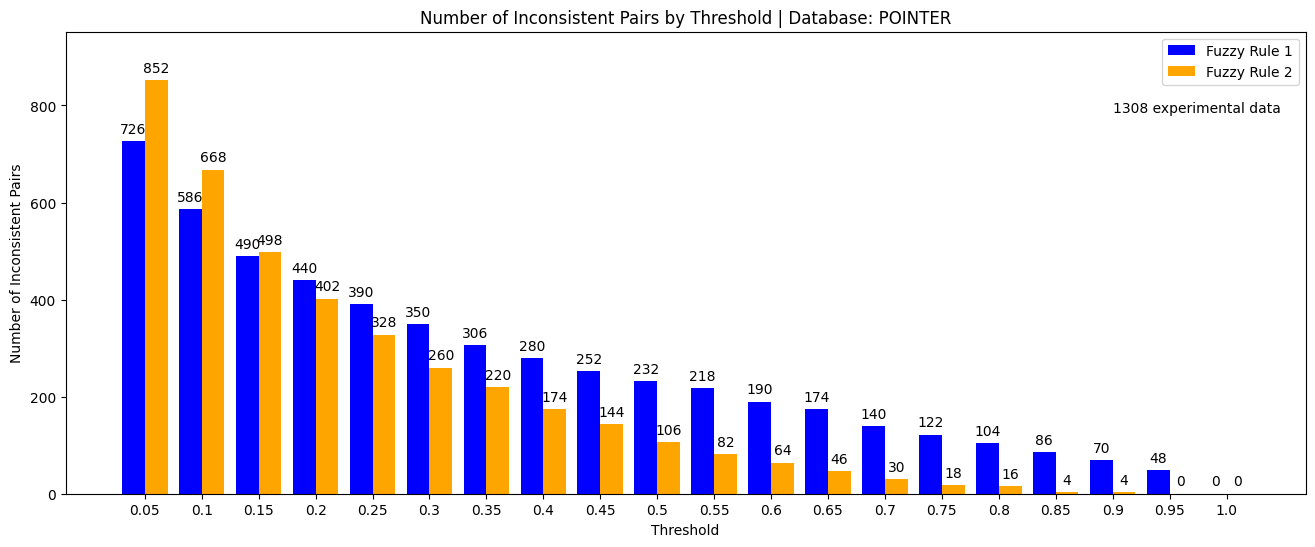

In [50]:
# Adjust the figure size
plt.figure(figsize=(plot_width, plot_height))

# Create the bar chart
bar_width = 0.4  # Width of the bars
bar_positions = np.arange(len(threshold_list))

# Plot the bars corresponding to numInconsistentPairs_list_1 and numInconsistentPairs_list_2
plt.bar(bar_positions - bar_width/2, numInconsistentPairs_list_1, width=bar_width, label='Fuzzy Rule 1', color='blue')
plt.bar(bar_positions + bar_width/2, numInconsistentPairs_list_2, width=bar_width, label='Fuzzy Rule 2', color='orange')

plt.xticks(bar_positions, threshold_list)  # Display threshold values on the x-axis
plt.xlabel("Threshold")
plt.ylabel("Number of Inconsistent Pairs")
plt.title(f"Number of Inconsistent Pairs by Threshold | Database: {database}")

# Show numerical values above each bar
for i, (value_1, value_2) in enumerate(zip(numInconsistentPairs_list_1, numInconsistentPairs_list_2)):
    plt.text(bar_positions[i] - bar_width/2, value_1 + 10, f'{value_1}', ha='center', va='bottom')
    plt.text(bar_positions[i] + bar_width/2, value_2 + 10, f'{value_2}', ha='center', va='bottom')

plt.text(0.98, 0.85, f'{num_experimental_dataOut_2} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

# plt.text(0.5, 0.95, f'{len(dataOut_1)} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')


# Set the y-axis range between 0 and 1000
plt.ylim(0, max(max(numInconsistentPairs_list_1),max(numInconsistentPairs_list_2)) + 100)

plt.legend()  # Show the legend with bar labels

plt.show()


## Distribution of the value of NVecinosI in DatosOut:

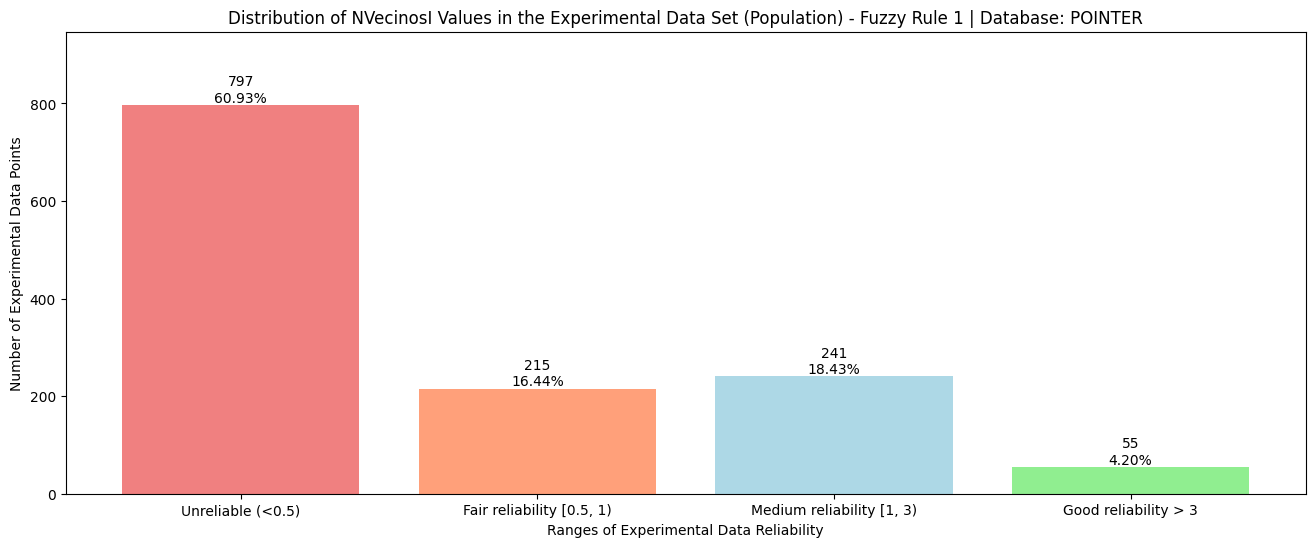

In [51]:
# Get values from position 11 (NVecinosI) in the corresponding data file
n_neighbors_values = dataOut_1.iloc[:, 10]  # Zero-based index
total_experimental_data = len(n_neighbors_values)

# Filter values according to different ranges
# < 0.5, [0.5, 1), [1, 3), > 3
values_less_than_0_5 = n_neighbors_values[n_neighbors_values < 0.5]  # Unreliable
values_between_0_5_and_1 = n_neighbors_values[(n_neighbors_values >= 0.5) & (n_neighbors_values < 1)]  # Fair reliability
values_between_1_and_3 = n_neighbors_values[(n_neighbors_values >= 1) & (n_neighbors_values < 3)]  # Medium reliability
values_greater_than_3 = n_neighbors_values[n_neighbors_values >= 3]  # Good reliability

# Count the number of values in each range
counts = [
    len(values_less_than_0_5),
    len(values_between_0_5_and_1),
    len(values_between_1_and_3),
    len(values_greater_than_3)
]

# Check if the sum of counts matches the total experimental data
if sum(counts) != total_experimental_data:
    raise ValueError("The sum of counts does not match the total experimental data.")

# Labels for the ranges
range_labels = ['Unreliable (<0.5)', 'Fair reliability [0.5, 1)', 'Medium reliability [1, 3)', 'Good reliability > 3']

# Calculate the total number of values in the dataset
total_values = sum(counts)

# Create a list to store the percentage values
percentage_values = [f'{(count / total_values) * 100:.2f}%' for count in counts]

# Create the bar chart
plt.figure(figsize=(plot_width, plot_height))
bars = plt.bar(range_labels, counts, color=['lightcoral', 'lightsalmon', 'lightblue', 'lightgreen'])
plt.xlabel('Ranges of Experimental Data Reliability')
plt.ylabel('Number of Experimental Data Points')
plt.title(f'Distribution of NVecinosI Values in the Experimental Data Set (Population) - Fuzzy Rule 1 | Database: {database}')

# Set the Y-axis range
plt.ylim(0, max(len(values_less_than_0_5), len(values_between_0_5_and_1), len(values_between_1_and_3), len(values_greater_than_3)) + 150)

# Display the total value and percentage above each bar
for bar, count, percentage in zip(bars, counts, percentage_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}\n{percentage}', ha='center', va='bottom')

plt.show()


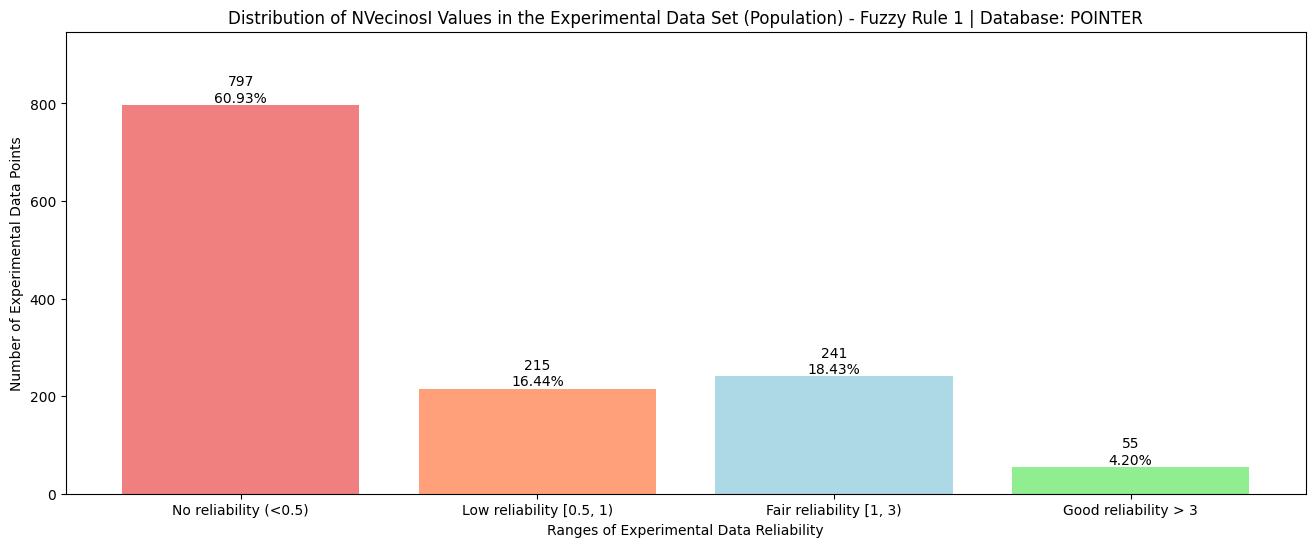

In [52]:
# Get values from position 11 (NVecinosI) in the corresponding data file
n_neighbors_values = dataOut_2.iloc[:, 10]  # Zero-based index
total_experimental_data = len(n_neighbors_values)

# Filter values according to different ranges
# < 0.5, [0.5, 1), [1, 3), > 3
values_less_than_0_5 = n_neighbors_values[n_neighbors_values < 0.5]  # No reliability
values_between_0_5_and_1 = n_neighbors_values[(n_neighbors_values >= 0.5) & (n_neighbors_values < 1)]  # Fair reliability
values_between_1_and_3 = n_neighbors_values[(n_neighbors_values >= 1) & (n_neighbors_values < 3)]  # Medium reliability
values_greater_than_3 = n_neighbors_values[n_neighbors_values >= 3]  # Good reliability

# Count the number of values in each range
counts_2 = [
    len(values_less_than_0_5),
    len(values_between_0_5_and_1),
    len(values_between_1_and_3),
    len(values_greater_than_3)
]

# Check if the sum of counts matches the total experimental data
if sum(counts) != total_experimental_data:
    raise ValueError("The sum of counts does not match the total experimental data.")

# Labels for the ranges
range_labels = ['No reliability (<0.5)', 'Low reliability [0.5, 1)', 'Fair reliability [1, 3)', 'Good reliability > 3']

# Calculate the total number of values in the dataset
total_values = sum(counts)

# Create a list to store the percentage values
percentage_values = [f'{(count / total_values) * 100:.2f}%' for count in counts]

# Create the bar chart
plt.figure(figsize=(plot_width, plot_height))
bars = plt.bar(range_labels, counts, color=['lightcoral', 'lightsalmon', 'lightblue', 'lightgreen'])
plt.xlabel('Ranges of Experimental Data Reliability')
plt.ylabel('Number of Experimental Data Points')
plt.title(f'Distribution of NVecinosI Values in the Experimental Data Set (Population) - Fuzzy Rule 1 | Database: {database}')

# Set the Y-axis range
plt.ylim(0, max(len(values_less_than_0_5), len(values_between_0_5_and_1), len(values_between_1_and_3), len(values_greater_than_3)) + 150)

# Display the total value and percentage above each bar
for bar, count, percentage in zip(bars, counts, percentage_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{count}\n{percentage}', ha='center', va='bottom')

plt.show()


0    0.23355
1    3.75300
2    3.71210
3    0.00000
4    1.99540
Name: 10, dtype: float64
1308


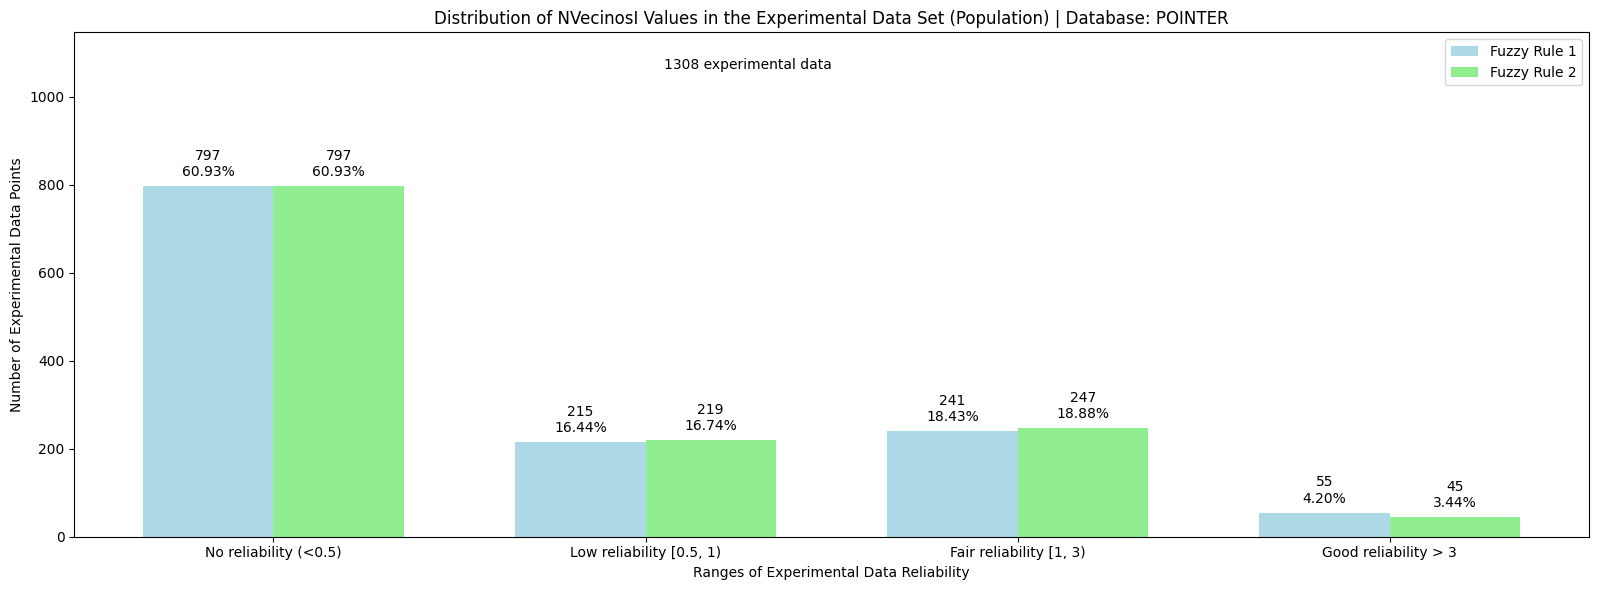

In [53]:
print( dataOut_1.iloc[:, 10].head(5))
print(len(dataOut_1.iloc[:, 0]))

# Get values from position 11 (NVecinosI) in the corresponding data file
n_neighbors_values_fuzzy1 = dataOut_1.iloc[:, 10]  # Zero-based index
total_experimental_data_fuzzy1 = len(n_neighbors_values_fuzzy1)

# Filter values according to different ranges
# < 0.5, [0.5, 1), [1, 3), > 3
values_less_than_0_5_fuzzy1 = n_neighbors_values_fuzzy1[n_neighbors_values_fuzzy1 < 0.5]  # Unreliable
values_between_0_5_and_1_fuzzy1 = n_neighbors_values_fuzzy1[(n_neighbors_values_fuzzy1 >= 0.5) & (n_neighbors_values_fuzzy1 < 1)]  # Fair reliability
values_between_1_and_3_fuzzy1 = n_neighbors_values_fuzzy1[(n_neighbors_values_fuzzy1 >= 1) & (n_neighbors_values_fuzzy1 < 3)]  # Medium reliability
values_greater_than_3_fuzzy1 = n_neighbors_values_fuzzy1[n_neighbors_values_fuzzy1 >= 3]  # Good reliability

# Count the number of values in each range
counts_fuzzy1 = [
    len(values_less_than_0_5_fuzzy1),
    len(values_between_0_5_and_1_fuzzy1),
    len(values_between_1_and_3_fuzzy1),
    len(values_greater_than_3_fuzzy1)
]

# Get values from position 11 (NVecinosI) in the corresponding data file
n_neighbors_values_fuzzy2 = dataOut_2.iloc[:, 10]  # Zero-based index
total_experimental_data_fuzzy2 = len(n_neighbors_values_fuzzy2)

# Filter values according to different ranges
#  < 0.5 -> Unreliable
#  [0.5, 1) -> Fair reliability
#  [1, 3) -> Medium reliability
#  > 3 -> Good reliability
values_less_than_0_5_fuzzy2 = n_neighbors_values_fuzzy2[n_neighbors_values_fuzzy2 < 0.5]  # Unreliable
values_between_0_5_and_1_fuzzy2 = n_neighbors_values_fuzzy2[(n_neighbors_values_fuzzy2 >= 0.5) & (n_neighbors_values_fuzzy2 < 1)]  # Fair reliability
values_between_1_and_3_fuzzy2 = n_neighbors_values_fuzzy2[(n_neighbors_values_fuzzy2 >= 1) & (n_neighbors_values_fuzzy2 < 3)]  # Medium reliability
values_greater_than_3_fuzzy2 = n_neighbors_values_fuzzy2[n_neighbors_values_fuzzy2 >= 3]  # Good reliability

# Count the number of values in each range
counts_fuzzy2 = [
    len(values_less_than_0_5_fuzzy2),
    len(values_between_0_5_and_1_fuzzy2),
    len(values_between_1_and_3_fuzzy2),
    len(values_greater_than_3_fuzzy2)
]

range_labels1 = ['No reliability (<0.5)', 'Low reliability [0.5, 1)', 'Fair reliability [1, 3)', 'Good reliability > 3']
range_labels2 = ['No reliability (<0.5)', 'Low reliability [0.5, 1)', 'Fair reliability [1, 3)', 'Good reliability > 3']

# Position of bars on the x-axis
x = np.arange(len(range_labels1))

# Width of bars
bar_width = 0.35

# Create the figure and axes for the plot
fig, ax = plt.subplots(figsize=(plot_width, plot_height))

# Configure the first set of bars
bar1 = ax.bar(x - bar_width/2, counts_fuzzy1, bar_width, label='Fuzzy Rule 1', color='lightblue')

# Configure the second set of bars
bar2 = ax.bar(x + bar_width/2, counts_fuzzy2, bar_width, label='Fuzzy Rule 2', color='lightgreen')

# Labels on the x-axis
ax.set_xticks(x)
ax.set_xticklabels(range_labels1,  ha="center")

# Axis labels and title
ax.set_xlabel('Ranges of Experimental Data Reliability')
ax.set_ylabel('Number of Experimental Data Points')
ax.set_title(f'Distribution of NVecinosI Values in the Experimental Data Set (Population) | Database: {database}')

# Legend
ax.legend()

# Show the plot
plt.tight_layout()

plt.ylim(0, max(max(counts_fuzzy1), max(counts_fuzzy2)) + 350)

# Calculate the total number of values for each set of bars
total_values_fuzzy1 = sum(counts_fuzzy1)
total_values_fuzzy2 = sum(counts_fuzzy2)

# Create a list to store the percentage values for each set of bars
percentage_values_fuzzy1 = [f'{(count / total_values_fuzzy1) * 100:.2f}%' for count in counts_fuzzy1]
percentage_values_fuzzy2 = [f'{(count / total_values_fuzzy2) * 100:.2f}%' for count in counts_fuzzy2]

# Display the values above each bar with percentages
for i, (bar, count1, count2, percentage1, percentage2) in enumerate(zip(bar1, counts_fuzzy1, counts_fuzzy2, percentage_values_fuzzy1, percentage_values_fuzzy2)):
    ax.annotate(f'{count1}\n{percentage1}', xy=(bar.get_x() + bar.get_width() / 2, count1), xytext=(0, 5),    
                textcoords="offset points", ha='center', va='bottom', color='black')
    ax.annotate(f'{count2}\n{percentage2}', xy=(bar.get_x() + bar.get_width() / 2 + bar.get_width(), count2), xytext=(0, 5),
                textcoords="offset points", ha='center', va='bottom', color='black')

plt.text(0.5, 0.95, f'{len(dataOut_1)} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

plt.show()

# Elimination of non-inconsistent data 

# Cleaning - Fuzzy Rule 1

In [54]:
# Lists to store DataFrames for good and bad consistency rows
good_consistency_data_1 = {}
bad_consistency_data_1 = {}
unique_bad_consistency_data_1 = {}

filtered_dataOut_1 = {}

# Lists to store values of Value_clean and F2_clean for each i
value_clean_values_1 = []
f2_clean_values_1 = []

# List to store improvements in stress level
stress_improvements_1 = []
pre_stress_values_1 = []
thresholds = []

# Critical values
critical_values_lower_1 = []
critical_values_upper_1 = []

# Values of i
i_values = []

for i in range(0, len(threshold_list)):
    inconsistent_data = []
    consistent_data = []
    
    # Process rows in pairs for paresInconsistentes_1[i]
    for j in range(0, len(inconsistentPairs_1[i]), 2):
        row1 = inconsistentPairs_1[i].iloc[j]
        row2 = inconsistentPairs_1[i].iloc[j + 1]

        # Calculate the difference between columns 9 and 10 for both rows
        row1_difference = abs(row1[8] - row1[9])
        row2_difference = abs(row2[8] - row2[9])

        # Select the row with the greater difference
        if row1_difference > row2_difference:
            inconsistent_data.append(row1)
            consistent_data.append(row2)
        else:
            inconsistent_data.append(row2)
            consistent_data.append(row1)

    # Create DataFrames with the selected rows for Bad and Good
    bad_consistency_data_1[i] = pd.DataFrame(inconsistent_data)
    good_consistency_data_1[i] = pd.DataFrame(consistent_data)

    # Check if inconsistent_data is empty
    if len(inconsistent_data) == 0:
        print(f"No bad experimental data for threshold {threshold_list[i]}. Filling with zeros or empty values.")
        
        # Fill with zeros or empty values
        bad_consistency_data_1[i] = pd.DataFrame()  # Empty DataFrame
        unique_bad_consistency_data_1[i] = pd.DataFrame()  # Empty DataFrame
        values_to_remove = []  # Empty list
        filtered_dataOut_1[i] = dataOut_1  # Original DataFrame
    else:

        # Remove duplicate rows using the first column as the identifier
        bad_consistency_data_1[i] = bad_consistency_data_1[i].drop_duplicates(subset=bad_consistency_data_1[i].columns[0])

        # Find unique bad rows
        unique_bad_consistency_data_1[i] = bad_consistency_data_1[i].drop_duplicates()

        # Get unique values from the first column of unique_bad_consistency_data_1[i]
        values_to_remove = unique_bad_consistency_data_1[i][unique_bad_consistency_data_1[i].columns[0]].unique()

        # Filter dataOut_1 rows that do not match the values to remove
        filtered_dataOut_1[i] = dataOut_1[~dataOut_1[dataOut_1.columns[0]].isin(values_to_remove)]

    # Check length and raise an exception if it doesn't match
    if len(filtered_dataOut_1[i]) + len(unique_bad_consistency_data_1[i]) != len(dataOut_1):
        raise Exception(f"The length of filtered_dataOut_1[{i}] + unique_bad_consistency_data_1[{i}] is not equal to the length of dataOut_1")

    # Get columns 9 and 10 from the clean DataOut file
    column_9 = dataOut_1.iloc[:, 8]  # Column 9 (zero-based index)
    column_10 = dataOut_1.iloc[:, 9]  # Column 10 (zero-based index)

    # Convert columns into NumPy arrays
    obj = np.array(column_9)
    subj = np.array(column_10)

    # Calculate the stress value
    value, F2 = stress(obj, subj)

    # Get columns 9 and 10 from the clean DataOut file
    column_9_clean = filtered_dataOut_1[i].iloc[:, 8]  # Column 9 (zero-based index)
    column_10_clean = filtered_dataOut_1[i].iloc[:, 9]  # Column 10 (zero-based index)

    # Convert columns into NumPy arrays
    obj_clean = np.array(column_9_clean)
    subj_clean = np.array(column_10_clean)

    # Calculate the stress value
    value_clean, f2_clean = stress(obj_clean, subj_clean)

    # Store values of Value_clean and F2_clean for each i
    value_clean_values_1.append(value_clean)
    f2_clean_values_1.append(f2_clean)

    # Compare STRESS values and store the improvement in stress level
    if value_clean < value:
        stress_improvement = value - value_clean
    else:
        stress_improvement = 0
        
    # Store values of stress before and after cleaning
    pre_stress_values_1.append(value)
    stress_improvements_1.append(stress_improvement)

    # Store the corresponding threshold
    thresholds.append(threshold_list[i])


No bad experimental data for threshold 1.0. Filling with zeros or empty values.


# Cleaning - Fuzzy Rule 2

In [55]:
# Lists to store DataFrames for good and bad consistency rows
good_consistency_data_2 = {}
bad_consistency_data_2 = {}
unique_bad_consistency_data_2 = {}

filtered_dataOut_2 = {}

# Lists to store values of Value_clean and F2_clean for each i
value_clean_values_2 = []
f2_clean_values_2 = []

# List to store improvements in stress level
stress_improvements_2 = []
pre_stress_values_2 = []
thresholds = []

# Critical values
critical_values_lower_2 = []
critical_values_upper_2 = []

# Values of i
i_values = []

for i in range(0, len(threshold_list)):
    inconsistent_data = []
    consistent_data = []
    
    # Process rows in pairs for paresInconsistentes_1[i]
    for j in range(0, len(inconsistentPairs_2[i]), 2):
        row1 = inconsistentPairs_2[i].iloc[j]
        row2 = inconsistentPairs_2[i].iloc[j + 1]

        # Calculate the difference between columns 9 and 10 for both rows
        row1_difference = abs(row1[8] - row1[9])
        row2_difference = abs(row2[8] - row2[9])

        # Select the row with the greater difference
        if row1_difference > row2_difference:
            inconsistent_data.append(row1)
            consistent_data.append(row2)
        else:
            inconsistent_data.append(row2)
            consistent_data.append(row1)

    # Create DataFrames with the selected rows for Bad and Good
    bad_consistency_data_2[i] = pd.DataFrame(inconsistent_data)
    good_consistency_data_2[i] = pd.DataFrame(consistent_data)

    # Check if inconsistent_data is empty
    if len(inconsistent_data) == 0:
        print(f"No bad experimental data for threshold {threshold_list[i]}. Filling with zeros or empty values.")
        
        # Fill with zeros or empty values
        bad_consistency_data_2[i] = pd.DataFrame()  # Empty DataFrame
        unique_bad_consistency_data_2[i] = pd.DataFrame()  # Empty DataFrame
        values_to_remove = []  # Empty list
        filtered_dataOut_2[i] = dataOut_2  # Original DataFrame
    else:

        # Remove duplicate rows using the first column as the identifier
        bad_consistency_data_2[i] = bad_consistency_data_2[i].drop_duplicates(subset=bad_consistency_data_2[i].columns[0])

        # Find unique bad rows
        unique_bad_consistency_data_2[i] = bad_consistency_data_2[i].drop_duplicates()

        # Get unique values from the first column of unique_bad_consistency_data_2[i]
        values_to_remove = unique_bad_consistency_data_2[i][unique_bad_consistency_data_2[i].columns[0]].unique()

        # Filter dataOut_2 rows that do not match the values to remove
        filtered_dataOut_2[i] = dataOut_2[~dataOut_2[dataOut_2.columns[0]].isin(values_to_remove)]

    # Check length and raise an exception if it doesn't match
    if len(filtered_dataOut_2[i]) + len(unique_bad_consistency_data_2[i]) != len(dataOut_2):
        raise Exception(f"The length of filtered_dataOut_2[{i}] + unique_bad_consistency_data_2[{i}] is not equal to the length of dataOut_2")

    # Get columns 9 and 10 from the clean DataOut file
    column_9 = dataOut_2.iloc[:, 8]  # Column 9 (zero-based index)
    column_10 = dataOut_2.iloc[:, 9]  # Column 10 (zero-based index)

    # Convert columns into NumPy arrays
    obj = np.array(column_9)
    subj = np.array(column_10)

    # Calculate the stress value
    value, F2 = stress(obj, subj)

    # Get columns 9 and 10 from the clean DataOut file
    column_9_clean = filtered_dataOut_2[i].iloc[:, 8]  # Column 9 (zero-based index)
    column_10_clean = filtered_dataOut_2[i].iloc[:, 9]  # Column 10 (zero-based index)

    # Convert columns into NumPy arrays
    obj_clean = np.array(column_9_clean)
    subj_clean = np.array(column_10_clean)

    # Calculate the stress value
    value_clean, f2_clean = stress(obj_clean, subj_clean)

    # Store values of Value_clean and F2_clean for each i
    value_clean_values_2.append(value_clean)
    f2_clean_values_2.append(f2_clean)

    # Compare STRESS values and store the improvement in stress level
    if value_clean < value:
        stress_improvement = value - value_clean
    else:
        stress_improvement = 0
        
    # Store values of stress before and after cleaning
    pre_stress_values_2.append(value)
    stress_improvements_2.append(stress_improvement)

    # Store the corresponding threshold
    thresholds.append(threshold_list[i])


No bad experimental data for threshold 0.95. Filling with zeros or empty values.
No bad experimental data for threshold 1.0. Filling with zeros or empty values.


In [56]:
# Lists to store DataFrames for good and bad consistency rows
good_consistency_data_1 = {}
bad_consistency_data_1 = {}
unique_bad_consistency_data_1 = {}

filtered_dataOut_1 = {}

# Lists to store values of Value_clean and F2_clean for each i
value_clean_values_1 = []
f2_clean_values_1 = []

# List to store improvements in stress level
stress_improvements_1 = []
pre_stress_values_1 = []
thresholds = []

# Critical values
critical_values_lower_1 = []
critical_values_upper_1 = []

# Values of i
i_values = []

for i in range(0, len(threshold_list)):
    inconsistent_data = []
    consistent_data = []
    
    # Process rows in pairs for paresInconsistentes_1[i]
    for j in range(0, len(inconsistentPairs_1[i]), 2):
        row1 = inconsistentPairs_1[i].iloc[j]
        row2 = inconsistentPairs_1[i].iloc[j + 1]

        # Calculate the difference between columns 9 and 10 for both rows
        row1_difference = abs(row1[8] - row1[9])
        row2_difference = abs(row2[8] - row2[9])

        # Select the row with the greater difference
        if row1_difference > row2_difference:
            inconsistent_data.append(row1)
            consistent_data.append(row2)
        else:
            inconsistent_data.append(row2)
            consistent_data.append(row1)

    # Create DataFrames with the selected rows for Bad and Good
    bad_consistency_data_1[i] = pd.DataFrame(inconsistent_data)
    good_consistency_data_1[i] = pd.DataFrame(consistent_data)

    # Check if inconsistent_data is empty
    if len(inconsistent_data) == 0:
        print(f"No bad experimental data for threshold {threshold_list[i]}. Filling with zeros or empty values.")
        
        # Fill with zeros or empty values
        bad_consistency_data_1[i] = pd.DataFrame()  # Empty DataFrame
        unique_bad_consistency_data_1[i] = pd.DataFrame()  # Empty DataFrame
        values_to_remove = []  # Empty list
        filtered_dataOut_1[i] = dataOut_1  # Original DataFrame
    else:

        # Remove duplicate rows using the first column as the identifier
        bad_consistency_data_1[i] = bad_consistency_data_1[i].drop_duplicates(subset=bad_consistency_data_1[i].columns[0])

        # Find unique bad rows
        unique_bad_consistency_data_1[i] = bad_consistency_data_1[i].drop_duplicates()

        # Get unique values from the first column of unique_bad_consistency_data_1[i]
        values_to_remove = unique_bad_consistency_data_1[i][unique_bad_consistency_data_1[i].columns[0]].unique()

        # Filter dataOut_1 rows that do not match the values to remove
        filtered_dataOut_1[i] = dataOut_1[~dataOut_1[dataOut_1.columns[0]].isin(values_to_remove)]

    # Check length and raise an exception if it doesn't match
    if len(filtered_dataOut_1[i]) + len(unique_bad_consistency_data_1[i]) != len(dataOut_1):
        raise Exception(f"The length of filtered_dataOut_1[{i}] + unique_bad_consistency_data_1[{i}] is not equal to the length of dataOut_1")

    # Get columns 9 and 10 from the clean DataOut file
    column_9 = dataOut_1.iloc[:, 8]  # Column 9 (zero-based index)
    column_10 = dataOut_1.iloc[:, 9]  # Column 10 (zero-based index)

    # Convert columns into NumPy arrays
    obj = np.array(column_9)
    subj = np.array(column_10)

    # Calculate the stress value
    value, F2 = stress(obj, subj)

    # Get columns 9 and 10 from the clean DataOut file
    column_9_clean = filtered_dataOut_1[i].iloc[:, 8]  # Column 9 (zero-based index)
    column_10_clean = filtered_dataOut_1[i].iloc[:, 9]  # Column 10 (zero-based index)

    # Convert columns into NumPy arrays
    obj_clean = np.array(column_9_clean)
    subj_clean = np.array(column_10_clean)

    # Calculate the stress value
    value_clean, f2_clean = stress(obj_clean, subj_clean)

    # Store values of Value_clean and F2_clean for each i
    value_clean_values_1.append(value_clean)
    f2_clean_values_1.append(f2_clean)

    # Compare STRESS values and store the improvement in stress level
    if value_clean < value:
        stress_improvement = value - value_clean
    else:
        stress_improvement = 0
        
    # Store values of stress before and after cleaning
    pre_stress_values_1.append(value)
    stress_improvements_1.append(stress_improvement)

    # Store the corresponding threshold
    thresholds.append(threshold_list[i])


No bad experimental data for threshold 1.0. Filling with zeros or empty values.


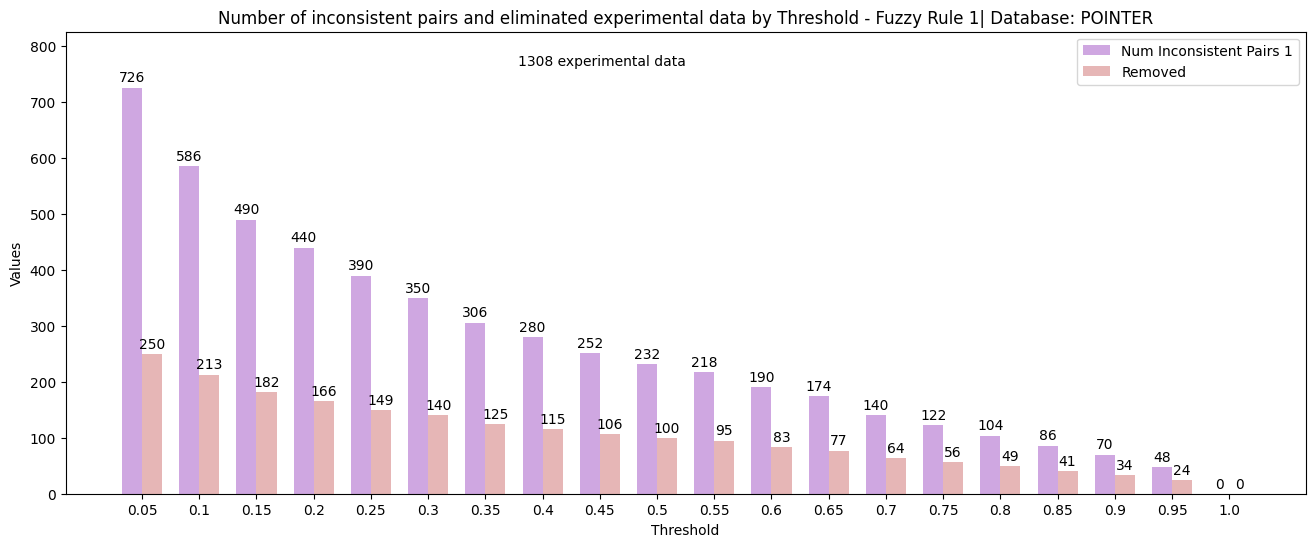

In [57]:
# Lists to store values of unique bad rows
inconsistent_pairs_to_remove_1 = []

# Get the values of unique bad rows for each threshold
for i in range(len(thresholds)):
    inconsistent_pairs_to_remove_1.append(len(unique_bad_consistency_data_1[i]))

# Create the bar chart
bar_width = 0.35  # Bar width
bar_positions = np.arange(len(thresholds))

# Add an offset for the second set of bars
offset = bar_width / 2

# Create the plot
plt.figure(figsize=(plot_width, plot_height))

# Plot bars for numParesInconsistentes_1
plt.bar(bar_positions - offset, numInconsistentPairs_list_1, width=bar_width, label='Num Inconsistent Pairs 1', color='#CFA7E1')
plt.bar(bar_positions + offset, inconsistent_pairs_to_remove_1, width=bar_width, label='Removed', color='#E6B6B6')

# Set the Y-axis range
plt.ylim(0, max(max(numInconsistentPairs_list_1), max(inconsistent_pairs_to_remove_1)) + 100)

# X-axis labels and values
plt.xticks(bar_positions, thresholds)
plt.xlabel("Threshold")
plt.ylabel("Values")
plt.title(f"Number of inconsistent pairs and eliminated experimental data by Threshold - Fuzzy Rule 1| Database: {database}")

# Show values above the bars
for i, value in enumerate(list(numInconsistentPairs_1.values())):
    plt.text(bar_positions[i] - offset, value + 5, str(value), ha='center', va='bottom', color='black')

for i, value in enumerate(inconsistent_pairs_to_remove_1):
    plt.text(bar_positions[i] + offset, value + 5, str(value), ha='center', va='bottom', color='black')

plt.text(0.5, 0.95, f'{len(dataOut_1)} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

plt.legend()  # Show legend with bar labels
plt.grid(False)

plt.show()

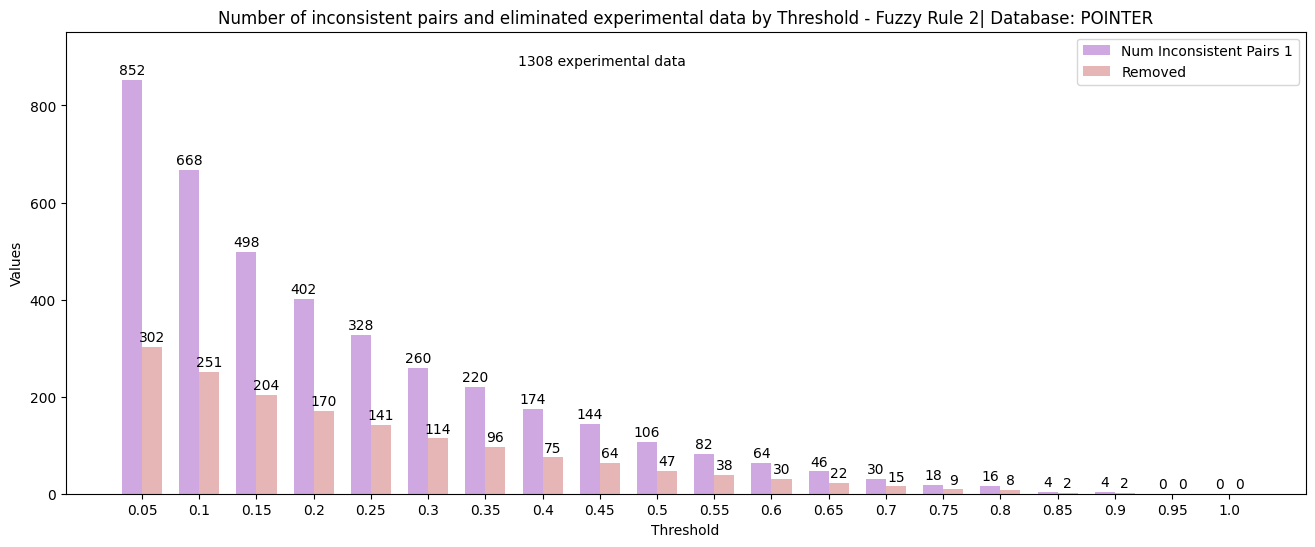

In [58]:
# Lists to store values of unique bad rows
inconsistent_pairs_to_remove_1 = []

# Get the values of unique bad rows for each threshold
for i in range(len(thresholds)):
    inconsistent_pairs_to_remove_1.append(len(unique_bad_consistency_data_2[i]))

# Create the bar chart
bar_width = 0.35  # Bar width
bar_positions = np.arange(len(thresholds))

# Add an offset for the second set of bars
offset = bar_width / 2

# Create the plot
plt.figure(figsize=(plot_width, plot_height))

# Plot bars for numParesInconsistentes_1
plt.bar(bar_positions - offset, numInconsistentPairs_list_2, width=bar_width, label='Num Inconsistent Pairs 1', color='#CFA7E1')
plt.bar(bar_positions + offset, inconsistent_pairs_to_remove_1, width=bar_width, label='Removed', color='#E6B6B6')

# Set the Y-axis range
plt.ylim(0, max(max(numInconsistentPairs_list_2), max(inconsistent_pairs_to_remove_1)) + 100)

# X-axis labels and values
plt.xticks(bar_positions, thresholds)
plt.xlabel("Threshold")
plt.ylabel("Values")
plt.title(f"Number of inconsistent pairs and eliminated experimental data by Threshold - Fuzzy Rule 2| Database: {database}")

# Show values above the bars
for i, value in enumerate(list(numInconsistentPairs_2.values())):
    plt.text(bar_positions[i] - offset, value + 5, str(value), ha='center', va='bottom', color='black')

for i, value in enumerate(inconsistent_pairs_to_remove_1):
    plt.text(bar_positions[i] + offset, value + 5, str(value), ha='center', va='bottom', color='black')

plt.text(0.5, 0.95, f'{len(dataOut_2)} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

plt.legend()  # Show legend with bar labels
plt.grid(False)

plt.show()


### Some test

In [59]:
print(f"Fuzzy Rule 1 test:")

for i in range(19, 0, -1):
    if len(unique_bad_consistency_data_1[i]) > 0:
        if isinstance(unique_bad_consistency_data_1[i], pd.DataFrame) and isinstance(unique_bad_consistency_data_1[i-1], pd.DataFrame):
            unique_values_i = set(unique_bad_consistency_data_1[i][unique_bad_consistency_data_1[i].columns[0]].unique())
            unique_values_i1 = set(unique_bad_consistency_data_1[i-1][unique_bad_consistency_data_1[i-1].columns[0]].unique())

            if unique_values_i.issubset(unique_values_i1):
                print(f"The experimental data to remove for threshold {thresholds[i]} is contained in threshold {thresholds[i-1]}.")
            else:
                print(f"Not all records from unique_bad_consistency_data[{i}] are contained in unique_bad_consistency_data[{i-1}].")
        else:
            print(f"unique_bad_consistency_data[{i}] or unique_bad_consistency_data[{i-1}] are not DataFrames.")
    else:
        print(f"There are no experimental data to remove for threshold {thresholds[i]}.")

Fuzzy Rule 1 test:
There are no experimental data to remove for threshold 1.0.
The experimental data to remove for threshold 0.95 is contained in threshold 0.9.
The experimental data to remove for threshold 0.9 is contained in threshold 0.85.
The experimental data to remove for threshold 0.85 is contained in threshold 0.8.
The experimental data to remove for threshold 0.8 is contained in threshold 0.75.
The experimental data to remove for threshold 0.75 is contained in threshold 0.7.
The experimental data to remove for threshold 0.7 is contained in threshold 0.65.
The experimental data to remove for threshold 0.65 is contained in threshold 0.6.
The experimental data to remove for threshold 0.6 is contained in threshold 0.55.
The experimental data to remove for threshold 0.55 is contained in threshold 0.5.
The experimental data to remove for threshold 0.5 is contained in threshold 0.45.
The experimental data to remove for threshold 0.45 is contained in threshold 0.4.
The experimental da

In [60]:
print(f"Fuzzy Rule 2 test:")

for i in range(19, 0, -1):
    if len(unique_bad_consistency_data_2[i]) > 0:
        if isinstance(unique_bad_consistency_data_2[i], pd.DataFrame) and isinstance(unique_bad_consistency_data_2[i-1], pd.DataFrame):
            unique_values_i = set(unique_bad_consistency_data_2[i][unique_bad_consistency_data_2[i].columns[0]].unique())
            unique_values_i1 = set(unique_bad_consistency_data_2[i-1][unique_bad_consistency_data_2[i-1].columns[0]].unique())

            if unique_values_i.issubset(unique_values_i1):
                print(f"The experimental data to remove for threshold {thresholds[i]} is contained in threshold {thresholds[i-1]}.")
            else:
                print(f"Not all records from unique_bad_consistency_data[{i}] are contained in unique_bad_consistency_data[{i-1}].")
        else:
            print(f"unique_bad_consistency_data[{i}] or unique_bad_consistency_data[{i-1}] are not DataFrames.")
    else:
        print(f"There are no experimental data to remove for threshold {thresholds[i]}.")

Fuzzy Rule 2 test:
There are no experimental data to remove for threshold 1.0.
There are no experimental data to remove for threshold 0.95.
The experimental data to remove for threshold 0.9 is contained in threshold 0.85.
The experimental data to remove for threshold 0.85 is contained in threshold 0.8.
The experimental data to remove for threshold 0.8 is contained in threshold 0.75.
The experimental data to remove for threshold 0.75 is contained in threshold 0.7.
The experimental data to remove for threshold 0.7 is contained in threshold 0.65.
The experimental data to remove for threshold 0.65 is contained in threshold 0.6.
The experimental data to remove for threshold 0.6 is contained in threshold 0.55.
The experimental data to remove for threshold 0.55 is contained in threshold 0.5.
The experimental data to remove for threshold 0.5 is contained in threshold 0.45.
The experimental data to remove for threshold 0.45 is contained in threshold 0.4.
The experimental data to remove for thre

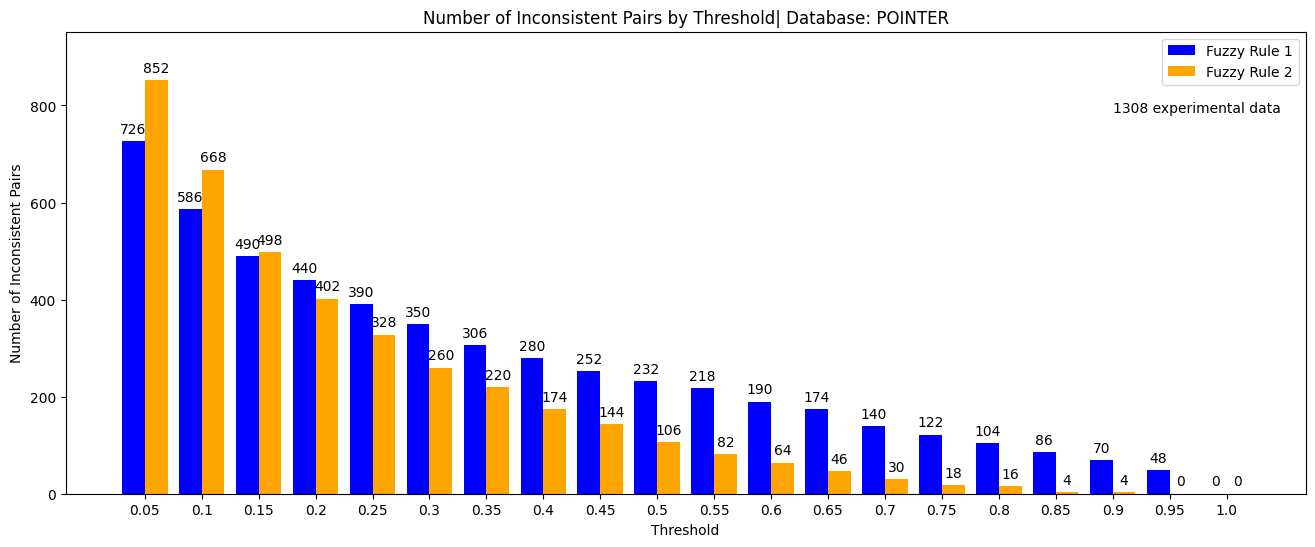

In [61]:
# Adjust the figure size
plt.figure(figsize=(plot_width, plot_height))

# Create the bar chart
bar_width = 0.4  # Width of the bars
bar_positions = np.arange(len(threshold_list))

# Plot the bars corresponding to numInconsistentPairs_list_1 and numInconsistentPairs_list_2
plt.bar(bar_positions - bar_width/2, numInconsistentPairs_list_1, width=bar_width, label='Fuzzy Rule 1', color='blue')
plt.bar(bar_positions + bar_width/2, numInconsistentPairs_list_2, width=bar_width, label='Fuzzy Rule 2', color='orange')

plt.xticks(bar_positions, threshold_list)  # Display threshold values on the x-axis
plt.xlabel("Threshold")
plt.ylabel("Number of Inconsistent Pairs")
plt.title(f"Number of Inconsistent Pairs by Threshold| Database: {database}")

# Show numerical values above each bar
for i, (value_1, value_2) in enumerate(zip(numInconsistentPairs_list_1, numInconsistentPairs_list_2)):
    plt.text(bar_positions[i] - bar_width/2, value_1 + 10, f'{value_1}', ha='center', va='bottom')
    plt.text(bar_positions[i] + bar_width/2, value_2 + 10, f'{value_2}', ha='center', va='bottom')

plt.text(0.98, 0.85, f'{num_experimental_dataOut_2} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

# plt.text(0.5, 0.95, f'{len(dataOut_1)} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')


# Set the y-axis range between 0 and 1000
plt.ylim(0, max(max(numInconsistentPairs_list_1),max(numInconsistentPairs_list_2)) + 100)

plt.legend()  # Show the legend with bar labels

plt.show()


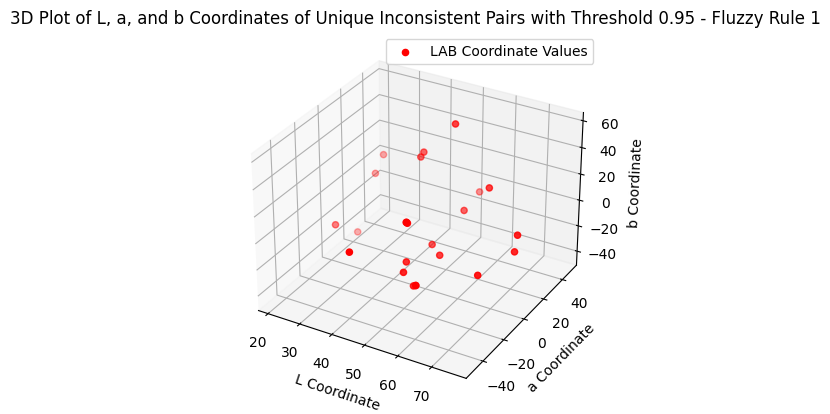

In [62]:
threshold_index = 0

for index in range(20):
    if len(unique_bad_consistency_data_1.get(index, [])) > 0:
        threshold_index = index
        
if threshold_index > 0:
       # Get the DataFrame 
    df = unique_bad_consistency_data_1[threshold_index]

    # Get the number of records in the DataFrame
    num_records = len(df)

    # Initialize lists for L, a, and b coordinates
    identifiers = []
    coordinates_L = []
    coordinates_a = []
    coordinates_b = []

    # Calculate L, a, and b coordinates
    for i in range(num_records):
        identifiers.append(df.iloc[i, 0])
        coordinates_L.append((df.iloc[i, 1] + df.iloc[i, 4]) / 2)
        coordinates_a.append((df.iloc[i, 2] + df.iloc[i, 5]) / 2)
        coordinates_b.append((df.iloc[i, 3] + df.iloc[i, 6]) / 2)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Add points to the plot with L, a, and b coordinates
    ax.scatter(coordinates_L, coordinates_a, coordinates_b, c='r', marker='o', label='LAB Coordinate Values')

    # Add identifier labels next to each point
    # for i in range(num_records):
    #     ax.text(coordinates_L[i], coordinates_a[i], coordinates_b[i], str(identifiers[i]), color='b', fontsize=10)

    # Configure axis labels
    ax.set_xlabel('L Coordinate')
    ax.set_ylabel('a Coordinate')
    ax.set_zlabel('b Coordinate')

    # Configure title
    plt.title(f'3D Plot of L, a, and b Coordinates of Unique Inconsistent Pairs with Threshold {thresholds[threshold_index]} - Fluzzy Rule 1')

    # Add a reference grid
    ax.grid(True)

    # Show the plot
    plt.legend()
    plt.show()

else: 
    print('No threshold with inconsistent pairs was found')


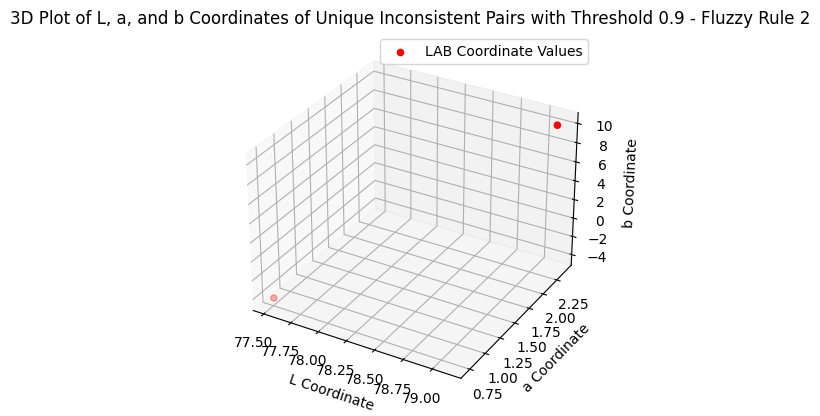

In [63]:
threshold_index = 0

for index in range(20):
    if len(unique_bad_consistency_data_2.get(index, [])) > 0:
        threshold_index = index
        
if threshold_index > 0:
       # Get the DataFrame 
    df = unique_bad_consistency_data_2[threshold_index]

    # Get the number of records in the DataFrame
    num_records = len(df)

    # Initialize lists for L, a, and b coordinates
    identifiers = []
    coordinates_L = []
    coordinates_a = []
    coordinates_b = []

    # Calculate L, a, and b coordinates
    for i in range(num_records):
        identifiers.append(df.iloc[i, 0])
        coordinates_L.append((df.iloc[i, 1] + df.iloc[i, 4]) / 2)
        coordinates_a.append((df.iloc[i, 2] + df.iloc[i, 5]) / 2)
        coordinates_b.append((df.iloc[i, 3] + df.iloc[i, 6]) / 2)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Add points to the plot with L, a, and b coordinates
    ax.scatter(coordinates_L, coordinates_a, coordinates_b, c='r', marker='o', label='LAB Coordinate Values')

    # Add identifier labels next to each point
    # for i in range(num_records):
    #     ax.text(coordinates_L[i], coordinates_a[i], coordinates_b[i], str(identifiers[i]), color='b', fontsize=10)

    # Configure axis labels
    ax.set_xlabel('L Coordinate')
    ax.set_ylabel('a Coordinate')
    ax.set_zlabel('b Coordinate')

    # Configure title
    plt.title(f'3D Plot of L, a, and b Coordinates of Unique Inconsistent Pairs with Threshold {thresholds[threshold_index]} - Fluzzy Rule 2')

    # Add a reference grid
    ax.grid(True)

    # Show the plot
    plt.legend()
    plt.show()

else: 
    print('No threshold with inconsistent pairs was found')


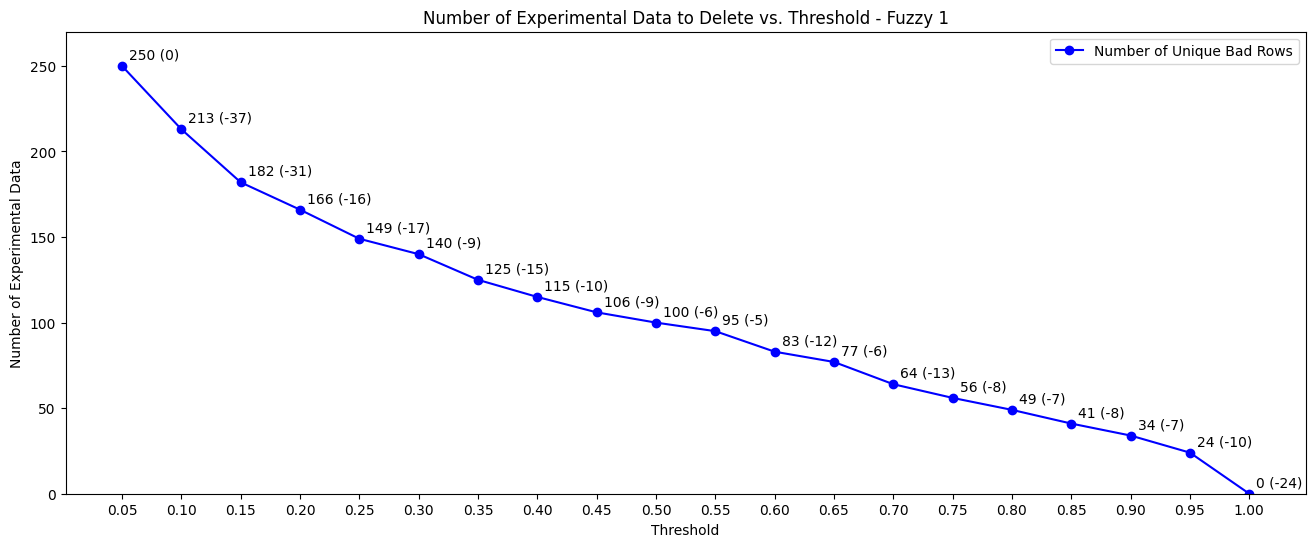

In [64]:
# Lists to store the values of unique bad rows
data_inconsistent_unique_to_delete = []

# Get the values of unique bad rows for each threshold
for i in range(len(thresholds)):
    data_inconsistent_unique_to_delete.append(len(unique_bad_consistency_data_1[i]))

# Create a line plot
plt.figure(figsize=(plot_width, plot_height))
plt.plot(thresholds, data_inconsistent_unique_to_delete, marker='o', linestyle='-', color='blue', label='Number of Unique Bad Rows')
plt.xlabel('Threshold')
plt.ylabel('Number of Experimental Data')
plt.title('Number of Experimental Data to Delete vs. Threshold - Fuzzy 1')
plt.grid(False)

# X-axis labels
plt.xticks(thresholds)

# Set the Y-axis range between 1.0 and 1.2
plt.ylim(0, max(data_inconsistent_unique_to_delete) + 20)

# Show the legend
plt.legend()

# Show the values on the data points
for i, (x, y) in enumerate(zip(thresholds, data_inconsistent_unique_to_delete)):
    if i > 0:
        diff = y - data_inconsistent_unique_to_delete[i - 1]
    else:
        diff = 0
    plt.annotate(f'{y} ({diff})', (x, y), textcoords="offset points", xytext=(5,5), ha='left')

plt.show()


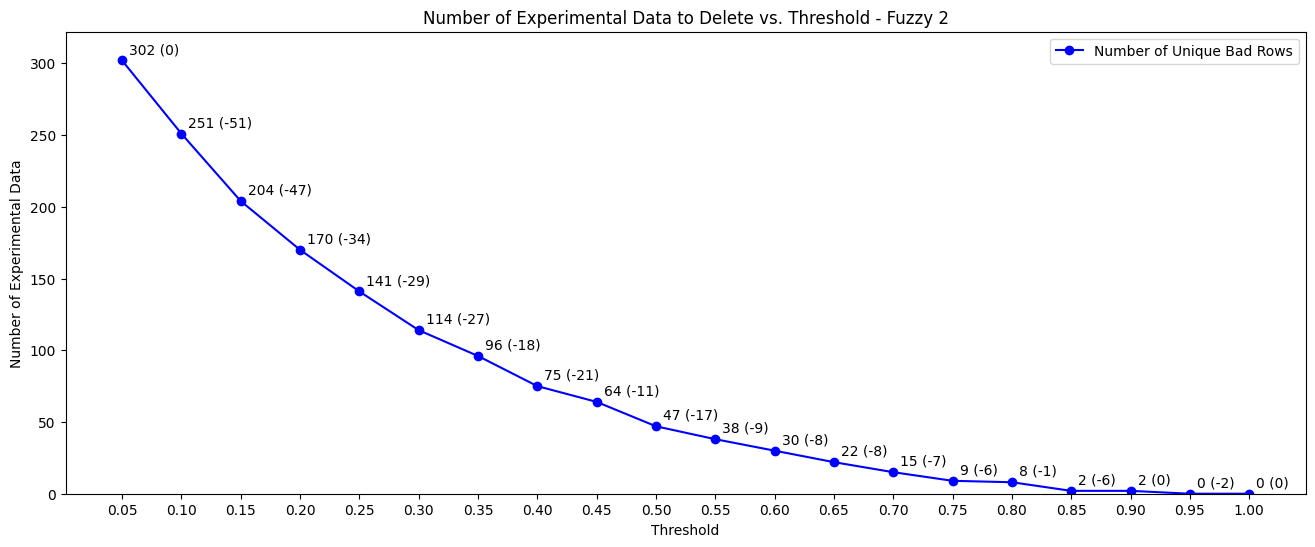

In [65]:
# Lists to store the values of unique bad rows
data_inconsistent_unique_to_delete = []

# Get the values of unique bad rows for each threshold
for i in range(len(thresholds)):
    data_inconsistent_unique_to_delete.append(len(unique_bad_consistency_data_2[i]))

# Create a line plot
plt.figure(figsize=(plot_width, plot_height))
plt.plot(thresholds, data_inconsistent_unique_to_delete, marker='o', linestyle='-', color='blue', label='Number of Unique Bad Rows')
plt.xlabel('Threshold')
plt.ylabel('Number of Experimental Data')
plt.title('Number of Experimental Data to Delete vs. Threshold - Fuzzy 2')
plt.grid(False)

# X-axis labels
plt.xticks(thresholds)

# Set the Y-axis range between 1.0 and 1.2
plt.ylim(0, max(data_inconsistent_unique_to_delete) + 20)

# Show the legend
plt.legend()

# Show the values on the data points
for i, (x, y) in enumerate(zip(thresholds, data_inconsistent_unique_to_delete)):
    if i > 0:
        diff = y - data_inconsistent_unique_to_delete[i - 1]
    else:
        diff = 0
    plt.annotate(f'{y} ({diff})', (x, y), textcoords="offset points", xytext=(5,5), ha='left')

plt.show()


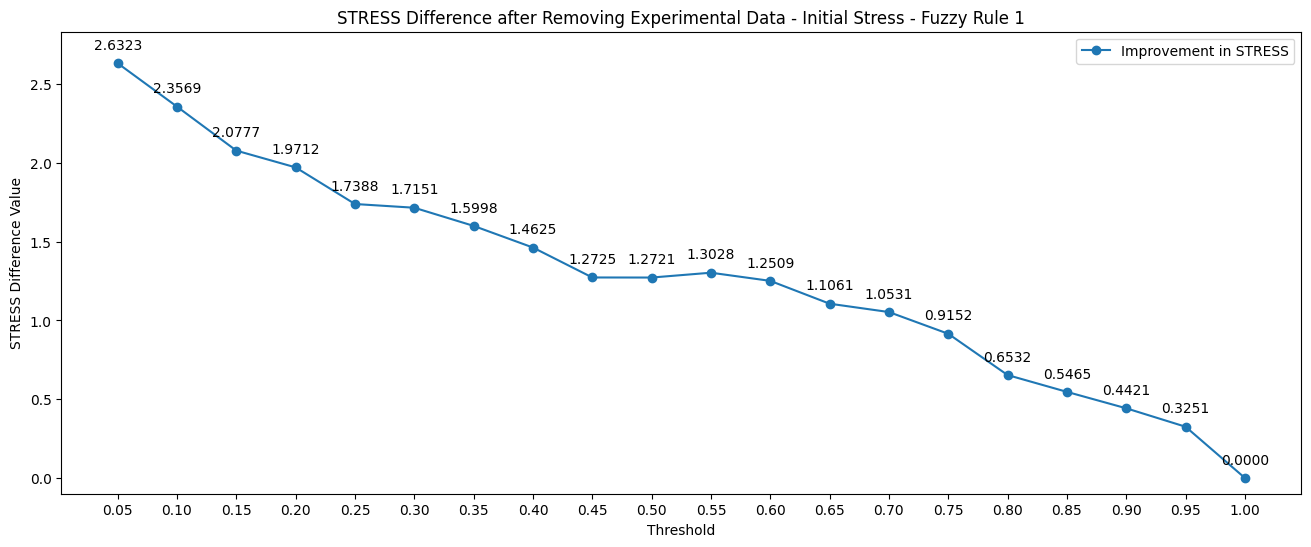

0: Improvement in stress level, for threshold 0.05: 2.6322669601531743 units.
1: Improvement in stress level, for threshold 0.1: 2.356924543842954 units.
2: Improvement in stress level, for threshold 0.15: 2.077666525617861 units.
3: Improvement in stress level, for threshold 0.2: 1.97116824629623 units.
4: Improvement in stress level, for threshold 0.25: 1.7387684150688472 units.
5: Improvement in stress level, for threshold 0.3: 1.7151209639219402 units.
6: Improvement in stress level, for threshold 0.35: 1.5998428768772968 units.
7: Improvement in stress level, for threshold 0.4: 1.4624968257658608 units.
8: Improvement in stress level, for threshold 0.45: 1.272524228018355 units.
9: Improvement in stress level, for threshold 0.5: 1.2720621138856458 units.
10: Improvement in stress level, for threshold 0.55: 1.3027609564302978 units.
11: Improvement in stress level, for threshold 0.6: 1.2509415657353387 units.
12: Improvement in stress level, for threshold 0.65: 1.1060594262306225 u

In [66]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(plot_width, plot_height))

# Create lines for stress values before and after cleaning, and for improvements
stress_improvement_line = ax.plot(thresholds, stress_improvements_1, marker='o', label='Improvement in STRESS')

# Annotations for improvements in stress level
for i, (threshold, improvement) in enumerate(zip(thresholds, stress_improvements_1)):
    ax.annotate(f'{improvement:.4f}', (threshold, improvement), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust the Y-axis range
ax.set_ylim(min(stress_improvements_1) - 0.1, max(stress_improvements_1) + 0.2)

# Axis labels and title
ax.set_xlabel('Threshold')
ax.set_ylabel('STRESS Difference Value')
ax.set_title('STRESS Difference after Removing Experimental Data - Initial Stress - Fuzzy Rule 1')

# Set the values for the x-axis
ax.set_xticks(thresholds)

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Print the improvements in stress level for each threshold
for i, improvement in enumerate(stress_improvements_1, start=0):
    print(f'{i}: Improvement in stress level, for threshold {thresholds[i]}: {improvement} units.')


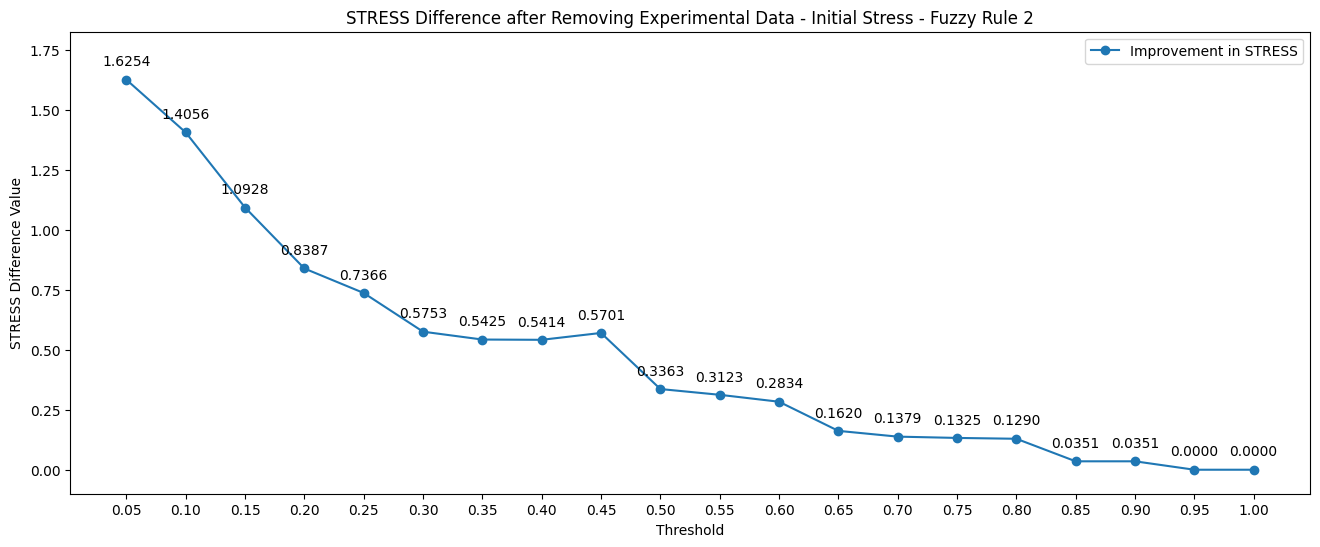

0: Improvement in stress level, for threshold 0.05: 1.6254258247748723 units.
1: Improvement in stress level, for threshold 0.1: 1.405601776958214 units.
2: Improvement in stress level, for threshold 0.15: 1.09277020867124 units.
3: Improvement in stress level, for threshold 0.2: 0.8386936068571842 units.
4: Improvement in stress level, for threshold 0.25: 0.7365596157033352 units.
5: Improvement in stress level, for threshold 0.3: 0.5753223616553953 units.
6: Improvement in stress level, for threshold 0.35: 0.5425481068792024 units.
7: Improvement in stress level, for threshold 0.4: 0.5414390941969174 units.
8: Improvement in stress level, for threshold 0.45: 0.5700683284131358 units.
9: Improvement in stress level, for threshold 0.5: 0.3362680366621902 units.
10: Improvement in stress level, for threshold 0.55: 0.3122780754085994 units.
11: Improvement in stress level, for threshold 0.6: 0.283390147804937 units.
12: Improvement in stress level, for threshold 0.65: 0.16195126445308006

In [67]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(plot_width, plot_height))

# Create lines for stress values before and after cleaning, and for improvements
stress_improvement_line = ax.plot(thresholds, stress_improvements_2, marker='o', label='Improvement in STRESS')

# Annotations for improvements in stress level
for i, (threshold, improvement) in enumerate(zip(thresholds, stress_improvements_2)):
    ax.annotate(f'{improvement:.4f}', (threshold, improvement), textcoords="offset points", xytext=(0,10), ha='center')

# Adjust the Y-axis range
ax.set_ylim(min(stress_improvements_2) - 0.1, max(stress_improvements_2) + 0.2)

# Axis labels and title
ax.set_xlabel('Threshold')
ax.set_ylabel('STRESS Difference Value')
ax.set_title('STRESS Difference after Removing Experimental Data - Initial Stress - Fuzzy Rule 2')

# Set the values for the x-axis
ax.set_xticks(thresholds)

# Show the legend
ax.legend()

# Show the plot
plt.show()

# Print the improvements in stress level for each threshold
for i, improvement in enumerate(stress_improvements_2, start=0):
    print(f'{i}: Improvement in stress level, for threshold {thresholds[i]}: {improvement} units.')


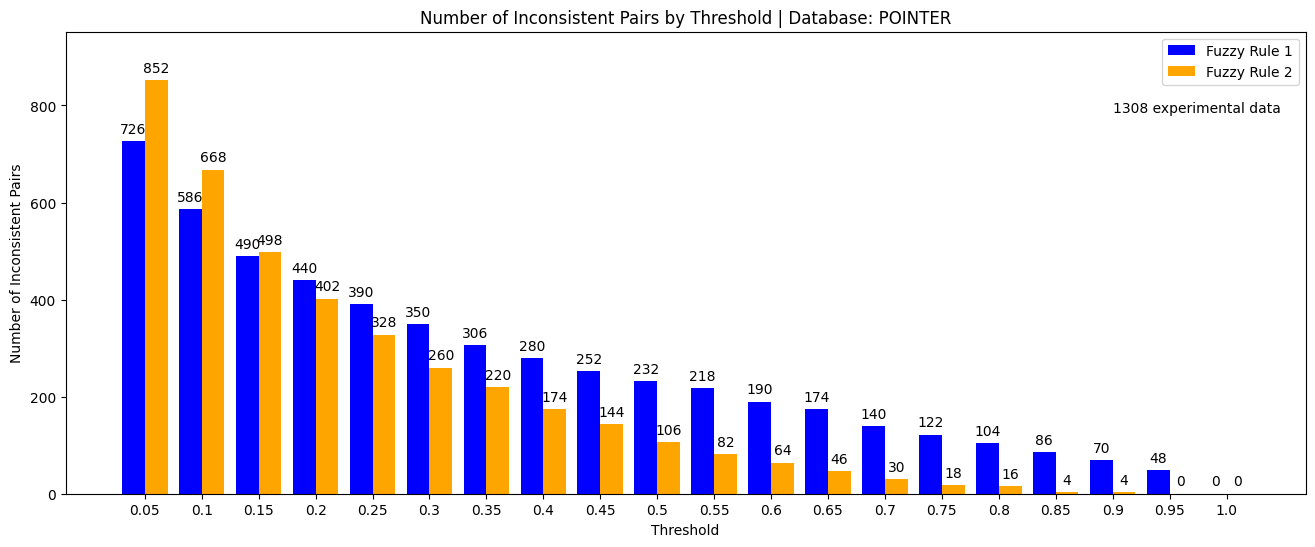

In [68]:
# Adjust the figure size
plt.figure(figsize=(plot_width, plot_height))

# Create the bar chart
bar_width = 0.4  # Width of the bars
bar_positions = np.arange(len(threshold_list))

# Plot the bars corresponding to numInconsistentPairs_list_1 and numInconsistentPairs_list_2
plt.bar(bar_positions - bar_width/2, numInconsistentPairs_list_1, width=bar_width, label='Fuzzy Rule 1', color='blue')
plt.bar(bar_positions + bar_width/2, numInconsistentPairs_list_2, width=bar_width, label='Fuzzy Rule 2', color='orange')

plt.xticks(bar_positions, threshold_list)  # Display threshold values on the x-axis
plt.xlabel("Threshold")
plt.ylabel("Number of Inconsistent Pairs")
plt.title(f"Number of Inconsistent Pairs by Threshold | Database: {database}")

# Show numerical values above each bar
for i, (value_1, value_2) in enumerate(zip(numInconsistentPairs_list_1, numInconsistentPairs_list_2)):
    plt.text(bar_positions[i] - bar_width/2, value_1 + 10, f'{value_1}', ha='center', va='bottom')
    plt.text(bar_positions[i] + bar_width/2, value_2 + 10, f'{value_2}', ha='center', va='bottom')

plt.text(0.98, 0.85, f'{num_experimental_dataOut_2} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')

# plt.text(0.5, 0.95, f'{len(dataOut_1)} experimental data', transform=plt.gca().transAxes, verticalalignment='top', horizontalalignment='right')


# Set the y-axis range between 0 and 1000
plt.ylim(0, max(max(numInconsistentPairs_list_1),max(numInconsistentPairs_list_2)) + 100)

plt.legend()  # Show the legend with bar labels

plt.show()


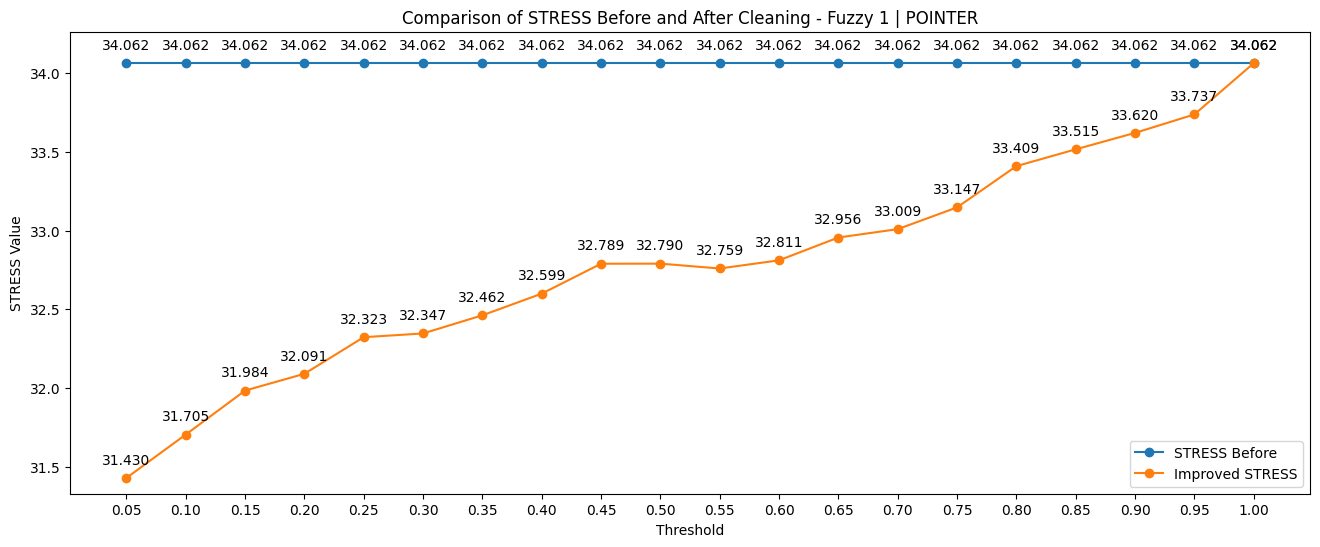

In [69]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(plot_width, plot_height))

# Create lines for stress values before and after cleaning, and for improvements
stress_before_line = ax.plot(thresholds, pre_stress_values_1, marker='o', label='STRESS Before')
stress_improved_line = ax.plot(thresholds, [Value - improvement for Value, improvement in zip(pre_stress_values_1, stress_improvements_1)], marker='o', label='Improved STRESS')

# Annotations for values of stress before
for i, (threshold, stress_value_before) in enumerate(zip(thresholds, pre_stress_values_1)):
    ax.annotate(f'{stress_value_before:.3f}', (threshold, stress_value_before), textcoords="offset points", xytext=(0,10), ha='center')

# Annotations for improved stress values
for i, (threshold, improvement) in enumerate(zip(thresholds, stress_improvements_1)):
    ax.annotate(f'{pre_stress_values_1[i] - improvement:.3f}', (threshold, pre_stress_values_1[i] - improvement), textcoords="offset points", xytext=(0,10), ha='center')

# Calculate Y-axis limits slightly above the maximum and slightly below the minimum
max_stress_value = max(max(pre_stress_values_1), max(pre_stress_values_1) - min(stress_improvements_1))
min_stress_value = min(min(pre_stress_values_1), min(pre_stress_values_1) - max(stress_improvements_1))

# Adjust the Y-axis range
ax.set_ylim(min_stress_value - 0.1, max_stress_value + 0.2)

# Axis labels and title
ax.set_xlabel('Threshold')
ax.set_ylabel('STRESS Value')
ax.set_title(f'Comparison of STRESS Before and After Cleaning - Fuzzy 1 | {database}')

# Set the values for the x-axis
ax.set_xticks(thresholds)

# Show the legend
ax.legend()

# Show the plot
plt.show()


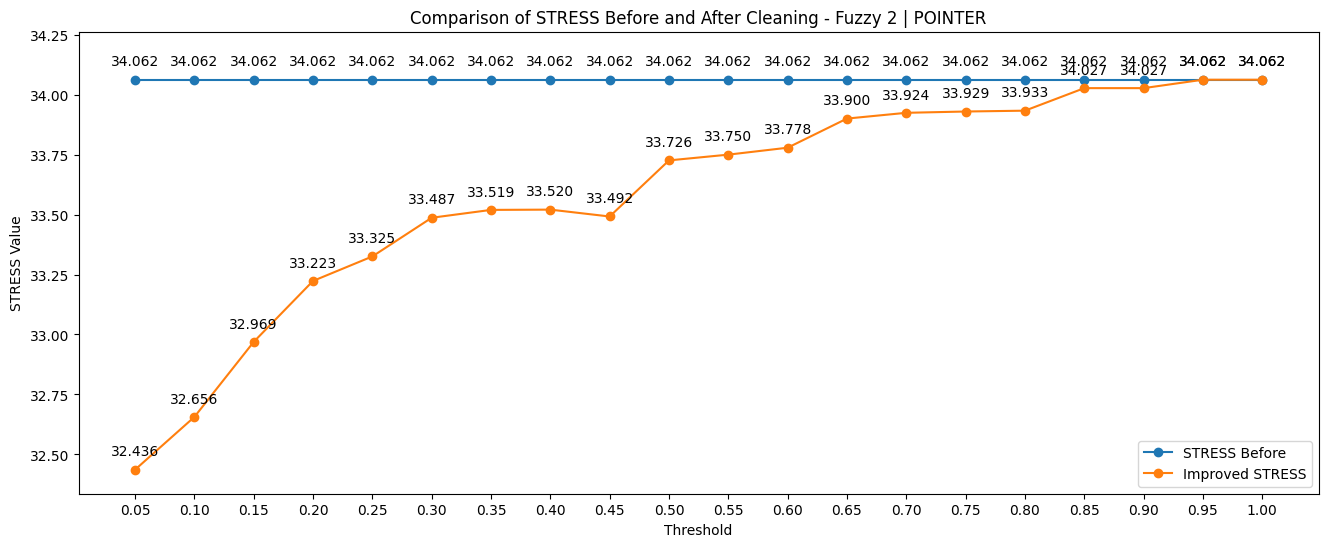

In [70]:
# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(plot_width, plot_height))

# Create lines for stress values before and after cleaning, and for improvements
stress_before_line = ax.plot(thresholds, pre_stress_values_2, marker='o', label='STRESS Before')
stress_improved_line = ax.plot(thresholds, [Value - improvement for Value, improvement in zip(pre_stress_values_2, stress_improvements_2)], marker='o', label='Improved STRESS')

# Annotations for values of stress before
for i, (threshold, stress_value_before) in enumerate(zip(thresholds, pre_stress_values_2)):
    ax.annotate(f'{stress_value_before:.3f}', (threshold, stress_value_before), textcoords="offset points", xytext=(0,10), ha='center')

# Annotations for improved stress values
for i, (threshold, improvement) in enumerate(zip(thresholds, stress_improvements_2)):
    ax.annotate(f'{pre_stress_values_2[i] - improvement:.3f}', (threshold, pre_stress_values_2[i] - improvement), textcoords="offset points", xytext=(0,10), ha='center')

# Calculate Y-axis limits slightly above the maximum and slightly below the minimum
max_stress_value = max(max(pre_stress_values_2), max(pre_stress_values_2) - min(stress_improvements_2))
min_stress_value = min(min(pre_stress_values_2), min(pre_stress_values_2) - max(stress_improvements_2))

# Adjust the Y-axis range
ax.set_ylim(min_stress_value - 0.1, max_stress_value + 0.2)

# Axis labels and title
ax.set_xlabel('Threshold')
ax.set_ylabel('STRESS Value')
ax.set_title(f'Comparison of STRESS Before and After Cleaning - Fuzzy 2 | {database}')

# Set the values for the x-axis
ax.set_xticks(thresholds)

# Show the legend
ax.legend()

# Show the plot
plt.show()


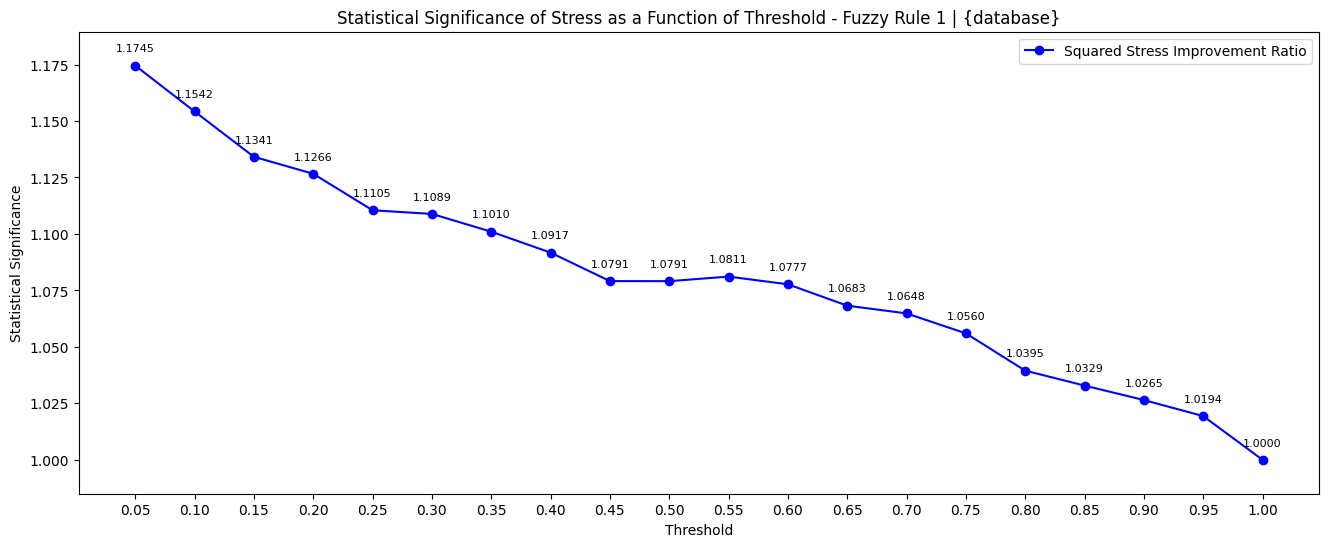

In [71]:
# Calculate the values of the ratio
squared_ratios = [(v ** 2) / ((v - m) ** 2) for v, m in zip(pre_stress_values_1, stress_improvements_1)]

# Create a new figure
plt.figure(figsize=(plot_width, plot_height))

# Create a line plot for squared ratios
plt.plot(thresholds, squared_ratios, marker='o', linestyle='-', color='b', label='Squared Stress Improvement Ratio')

# Add ratio values as annotations at each point
for i, (x, y) in enumerate(zip(thresholds, squared_ratios)):
    plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Add titles and labels to the axes
plt.title('Statistical Significance of Stress as a Function of Threshold - Fuzzy Rule 1 | {database}')
plt.xlabel('Threshold')
plt.ylabel('Statistical Significance')

# X-axis labels
plt.xticks(thresholds)

# Calculate Y-axis limits slightly above the maximum and slightly below the minimum

# Adjust the Y-axis range
plt.ylim(min(squared_ratios) - 0.015, max(squared_ratios) + 0.015)

# Show the legend
plt.legend()

# Show the plot
plt.show()


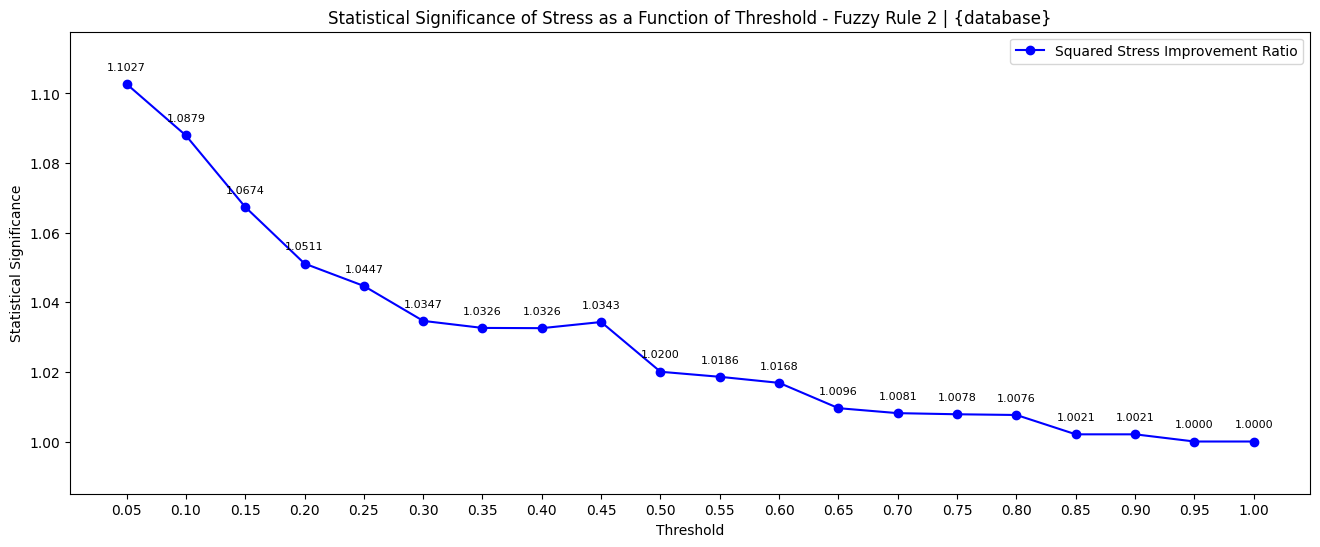

In [72]:
# Calculate the values of the ratio
squared_ratios = [(v ** 2) / ((v - m) ** 2) for v, m in zip(pre_stress_values_2, stress_improvements_2)]

# Create a new figure
plt.figure(figsize=(plot_width, plot_height))

# Create a line plot for squared ratios
plt.plot(thresholds, squared_ratios, marker='o', linestyle='-', color='b', label='Squared Stress Improvement Ratio')

# Add ratio values as annotations at each point
for i, (x, y) in enumerate(zip(thresholds, squared_ratios)):
    plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Add titles and labels to the axes
plt.title('Statistical Significance of Stress as a Function of Threshold - Fuzzy Rule 2 | {database}')
plt.xlabel('Threshold')
plt.ylabel('Statistical Significance')

# X-axis labels
plt.xticks(thresholds)

# Calculate Y-axis limits slightly above the maximum and slightly below the minimum

# Adjust the Y-axis range
plt.ylim(min(squared_ratios) - 0.015, max(squared_ratios) + 0.015)

# Show the legend
plt.legend()

# Show the plot
plt.show()


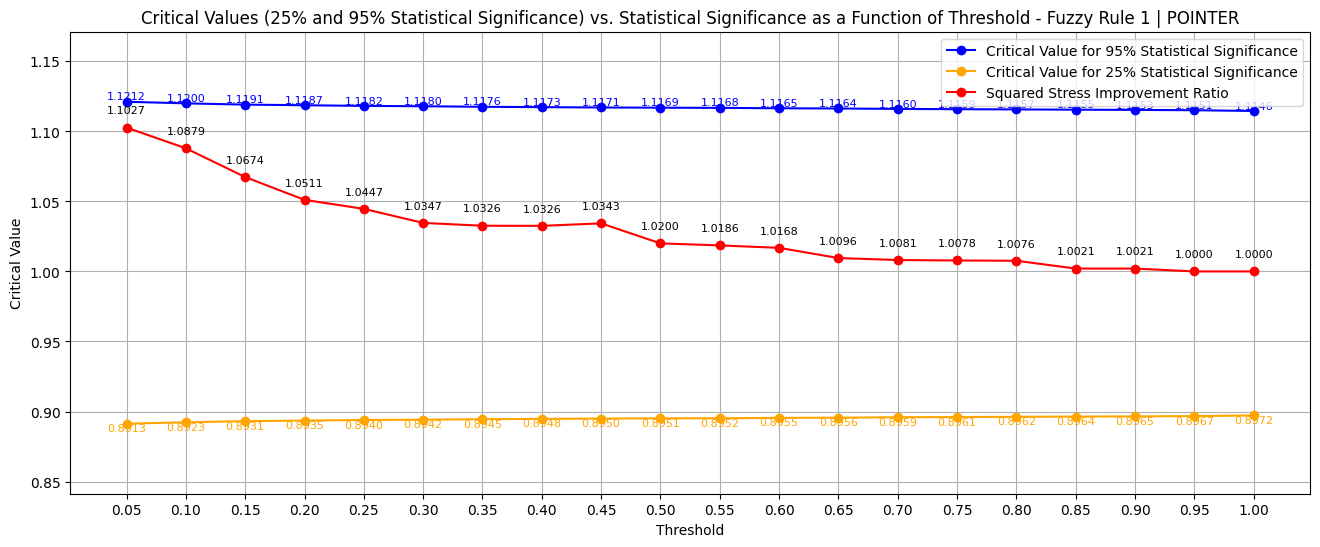

In [73]:
# Parameters
alpha = 0.025

# Lists to store critical values
critical_values_lower = []
critical_values_upper = []

# Calculate critical values for each threshold value
for i in range(len(thresholds)):
    dof_num = len(filtered_dataOut_1[i]) - 1
    dof_den = len(bad_consistency_data_1[i]) + len(filtered_dataOut_1[i]) - 1
    critical_value_lower = stats.f.ppf(1 - alpha, dof_num, dof_den)
    critical_value_upper = stats.f.ppf(alpha, dof_num, dof_den)
    critical_values_lower.append(critical_value_lower)
    critical_values_upper.append(critical_value_upper)

# Create a line plot for critical values
plt.figure(figsize=(plot_width, plot_height))
plt.plot(thresholds, critical_values_lower, marker='o', linestyle='-', color='blue', label='Critical Value for 95% Statistical Significance')
plt.plot(thresholds, critical_values_upper, marker='o', linestyle='-', color='orange', label='Critical Value for 25% Statistical Significance')
plt.plot(thresholds, squared_ratios, marker='o', linestyle='-', color='red', label='Squared Stress Improvement Ratio')

# Add ratio values as annotations at each point
for i, (x, y) in enumerate(zip(thresholds, squared_ratios)):
    plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Show the value of each dot
for x, y_lower, y_upper in zip(thresholds, critical_values_lower, critical_values_upper):
    plt.text(x, y_lower, f'{y_lower:.4f}', ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(x, y_upper, f'{y_upper:.4f}', ha='center', va='top', fontsize=8, color='orange')

# Adjust the Y-axis range
plt.ylim( min(min(critical_values_upper),min(squared_ratios),min(critical_values_lower)) -0.05 , max(max(critical_values_upper),max(squared_ratios),max(critical_values_lower)) +0.05 )

# X-axis labels
plt.xticks(thresholds)

plt.xlabel('Threshold')
plt.ylabel('Critical Value')
plt.title(f'Critical Values (25% and 95% Statistical Significance) vs. Statistical Significance as a Function of Threshold - Fuzzy Rule 1 | {database}')
plt.legend()
plt.grid(True)
plt.show()


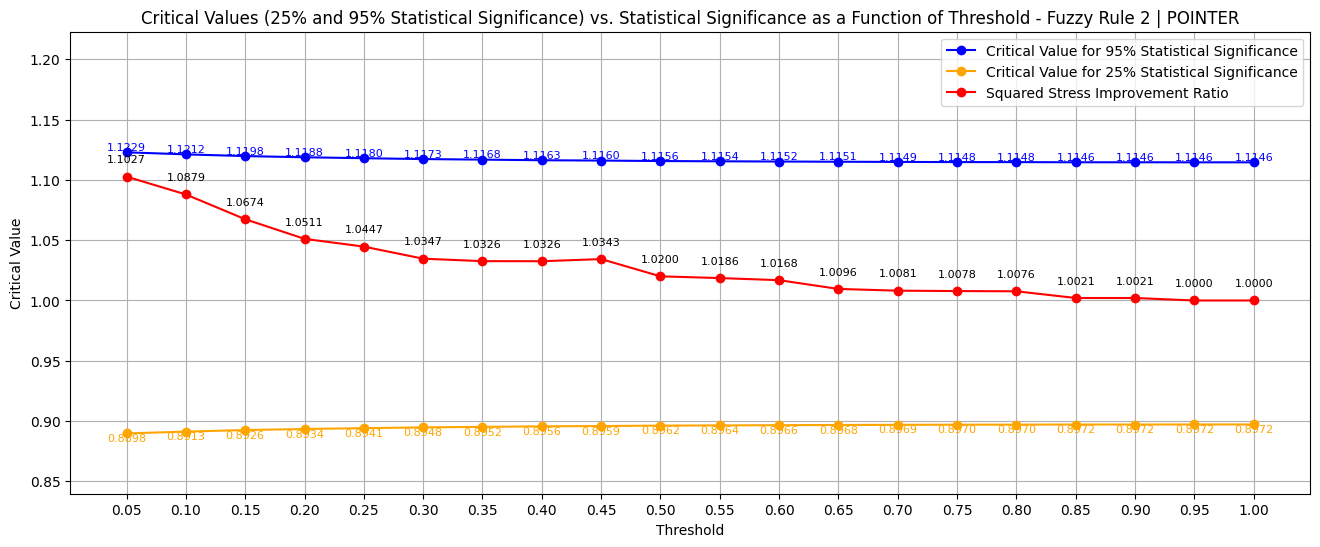

In [74]:
# Parameters
alpha = 0.025

# Lists to store critical values
critical_values_lower = []
critical_values_upper = []

# Calculate critical values for each threshold value
for i in range(len(thresholds)):
    dof_num = len(filtered_dataOut_2[i]) - 1
    dof_den = len(bad_consistency_data_2[i]) + len(filtered_dataOut_2[i]) - 1
    critical_value_lower = stats.f.ppf(1 - alpha, dof_num, dof_den)
    critical_value_upper = stats.f.ppf(alpha, dof_num, dof_den)
    critical_values_lower.append(critical_value_lower)
    critical_values_upper.append(critical_value_upper)

# Create a line plot for critical values
plt.figure(figsize=(plot_width, plot_height))
plt.plot(thresholds, critical_values_lower, marker='o', linestyle='-', color='blue', label='Critical Value for 95% Statistical Significance')
plt.plot(thresholds, critical_values_upper, marker='o', linestyle='-', color='orange', label='Critical Value for 25% Statistical Significance')
plt.plot(thresholds, squared_ratios, marker='o', linestyle='-', color='red', label='Squared Stress Improvement Ratio')

# Add ratio values as annotations at each point
for i, (x, y) in enumerate(zip(thresholds, squared_ratios)):
    plt.annotate(f'{y:.4f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# Show the value of each dot
for x, y_lower, y_upper in zip(thresholds, critical_values_lower, critical_values_upper):
    plt.text(x, y_lower, f'{y_lower:.4f}', ha='center', va='bottom', fontsize=8, color='blue')
    plt.text(x, y_upper, f'{y_upper:.4f}', ha='center', va='top', fontsize=8, color='orange')

# Adjust the Y-axis range
plt.ylim( min(min(critical_values_upper),min(squared_ratios),min(critical_values_lower)) -0.05 , max(max(critical_values_upper),max(squared_ratios),max(critical_values_lower)) +0.1 )

# X-axis labels
plt.xticks(thresholds)

plt.xlabel('Threshold')
plt.ylabel('Critical Value')
plt.title(f'Critical Values (25% and 95% Statistical Significance) vs. Statistical Significance as a Function of Threshold - Fuzzy Rule 2 | {database}')
plt.legend()
plt.grid(True)
plt.show()
